In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib inline

In [14]:
def load_data(filename):
    dtypes = {
        'MachineIdentifier':                                    'str',
        'ProductName':                                          'str',
        'EngineVersion':                                        'str',
        'AppVersion':                                           'str',
        'AvSigVersion':                                         'str',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float64',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'str',
        'Processor':                                            'str',
        'OsVer':                                                'str',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'str',
        'OsBuildLab':                                           'str',
        'SkuEdition':                                           'str',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'str',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'str',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', 
        'Census_MDC2FormFactor':                                'str',
        'Census_DeviceFamily':                                  'str',
        'Census_OEMNameIdentifier':                             'float32', 
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', 
        'Census_ProcessorClass':                                'str',
        'Census_PrimaryDiskTotalCapacity':                      'float64', 
        'Census_PrimaryDiskTypeName':                           'str',
        'Census_SystemVolumeTotalCapacity':                     'float64', 
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'str',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', 
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', 
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', 
        'Census_PowerPlatformRoleName':                         'str',
        'Census_InternalBatteryType':                           'str',
        'Census_InternalBatteryNumberOfCharges':                'float64', 
        'Census_OSVersion':                                     'str',
        'Census_OSArchitecture':                                'str',
        'Census_OSBranch':                                      'str',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'str',
        'Census_OSSkuName':                                     'str',
        'Census_OSInstallTypeName':                             'str',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'str',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'str',
        'Census_ActivationChannel':                             'str',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'str',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

    df = pd.read_csv(filename, dtype=dtypes, engine='c')
    return df

In [43]:
def analyze(df):
    #i=0
    all_cols=[]
    for col in df.columns:
        if col == 'MachineIdentifier': continue
        all_cols.append(col)
        desc = df[col].describe()
        print("-- Name: {:}  Type: {:} Count: {:} \t Unique: {:} \t Missing: {:}".format(desc.name.ljust(50), str(desc.dtype).ljust(10), df[col].count(), df[col].nunique(), df[col].hasnans))
        if df[col].hasnans:
                print("---- has missing values")
        max_len = df[col].nunique()
        if max_len > 50:
            max_len = 50
        #
        # look at all strings
        #
        if df[col].dtype.name == 'object':
            #if df[col].hasnans:
            #    df[col].fillna("", inplace=True)
                
            if len(df[col].str.lower().unique()) != len(df[col].unique()):
                print("---- has strings that differ only in case")
                
            #
            # look for HTML escape characters (&#x..;)
            # and unicode characters (searching for: anything not printable)
            #
            
            df_bad = df[col][df[col].str.contains(r'[\x00-\x1f]|&#x\d\d;', regex=True, na=True)]
            if len(df_bad)>0:
                print("---- illegal characters:",len(df_bad))
            #
            # find different capitalizations of "unknown"
            # if more than one present, need to read as string, turn to lowercase, then make categorical
            #
            df_unknown = df[col].str.lower() == 'unknown'
            unknowns = df[col][df_unknown].unique()
            if len(unknowns) > 1:
                print("----",unknowns)
            df[col] = df[col].astype('category')
            print("---- top 50 values:")
            values = df[col].dtype.categories.get_values()
            print(df[col].dtype.categories.get_values()[:max_len])
        else:
            print("---- statistics")
            print("\tMean: {:} \n\t Std: {:} \n\t Min: {:} \n\t 25%: {:} \n\t 50%: {:} \n\t 75%: {:} \n\t Max: {:}".
                  format(desc.mean(), desc.std(), desc.min(), desc.quantile(.25), desc.quantile(.5), desc.quantile(.75), desc.max()))

    numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric_cols = [c for c,v in df.dtypes.items() if v in numerics and c in df.columns]
    
    nominal_cols = [c for c in df.columns if (c not in numeric_cols)]
    nominal_cols.remove('MachineIdentifier')
    
    binary_cols = [c for c in df.columns if (df[c].nunique() == 2 and c not in nominal_cols)]
    unary_cols = [c for c in df.columns if (df[c].nunique() == 1 and c not in nominal_cols)]
    continuous_cols = [c for c in numeric_cols if (c not in np.concatenate((binary_cols, unary_cols)))]
    
    i=0
    for col in nominal_cols:
        max_len = df[col].nunique()
        if max_len > 50:
            max_len = 50
        plt.figure(i)
        df[col].value_counts(sort=False).sort_values(ascending=False).nlargest(max_len).plot(kind='barh', figsize=(10,8), title=col)
        i=i+1
        
    df[continuous_cols].hist(figsize=(48,48), bins=50)
    df[np.concatenate((binary_cols, unary_cols))].hist(figsize=(48,48), bins=50)
    
    plt.show()

            

-- Name: ProductName                                         Type: object     Count: 66911 	 Unique: 2 	 Missing: False
---- top 50 values:
['mse' 'win8defender']
-- Name: EngineVersion                                       Type: object     Count: 66911 	 Unique: 42 	 Missing: False
---- top 50 values:
['1.1.11701.0' '1.1.12805.0' '1.1.12902.0' '1.1.13000.0' '1.1.13103.0'
 '1.1.13202.0' '1.1.13303.0' '1.1.13407.0' '1.1.13504.0' '1.1.13601.0'
 '1.1.13701.0' '1.1.13704.0' '1.1.13803.0' '1.1.13804.0' '1.1.13903.0'
 '1.1.14001.0' '1.1.14003.0' '1.1.14102.0' '1.1.14103.0' '1.1.14104.0'
 '1.1.14201.0' '1.1.14202.0' '1.1.14303.0' '1.1.14305.0' '1.1.14306.0'
 '1.1.14405.2' '1.1.14500.2' '1.1.14500.5' '1.1.14600.4' '1.1.14700.3'
 '1.1.14700.4' '1.1.14700.5' '1.1.14800.1' '1.1.14800.3' '1.1.14901.3'
 '1.1.14901.4' '1.1.15000.1' '1.1.15000.2' '1.1.15100.1' '1.1.15200.1'
 '1.1.15300.5' '1.1.15300.6']
-- Name: AppVersion                                          Type: object     Count: 66911 	 Uniqu

/Users/kevin/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/kevin/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/kevin/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly 

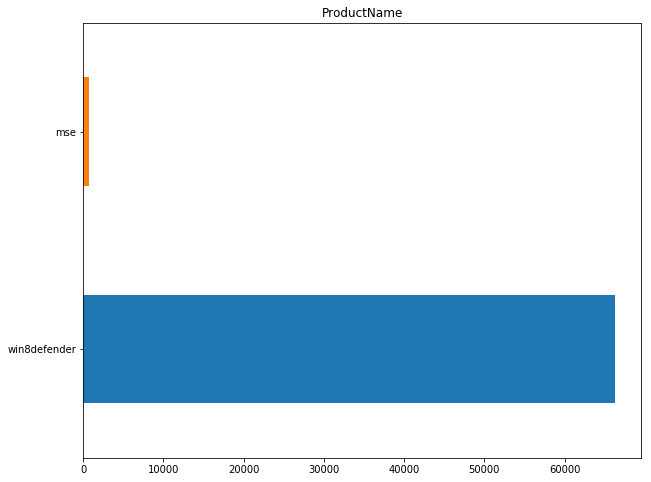

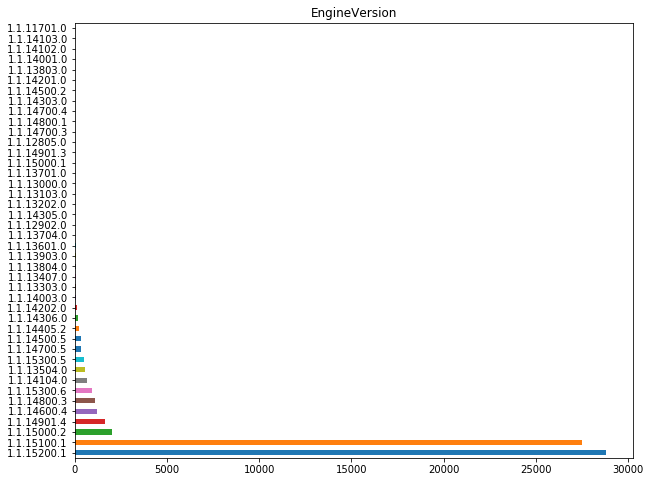

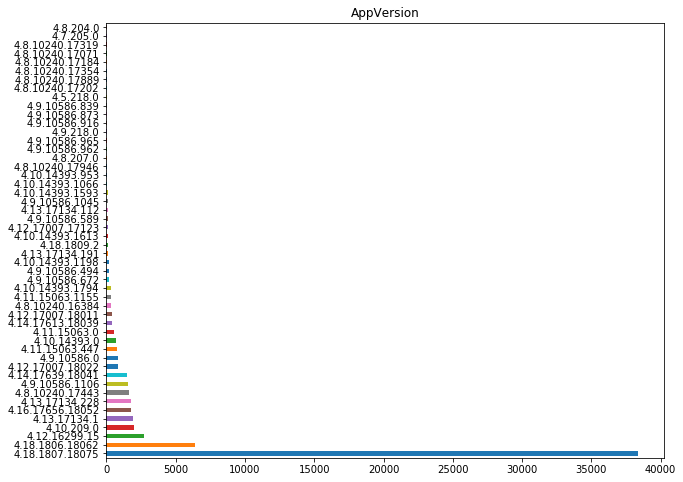

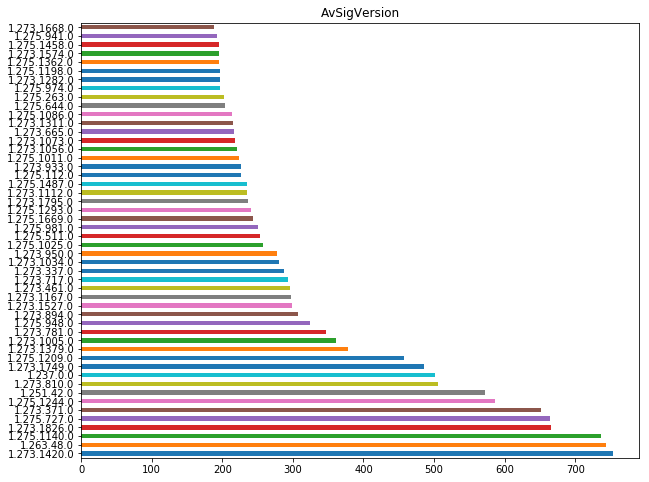

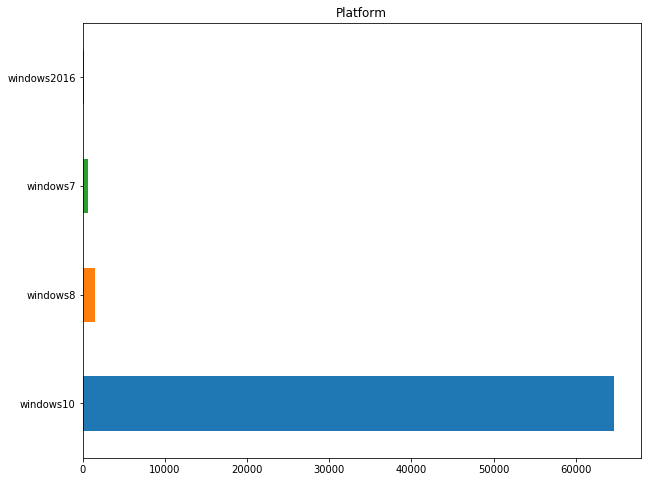

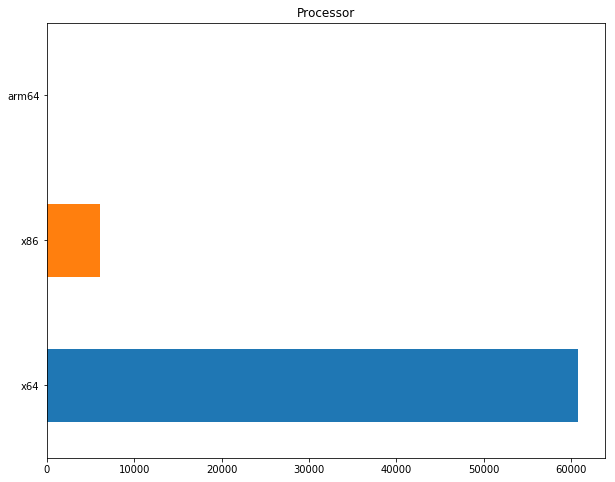

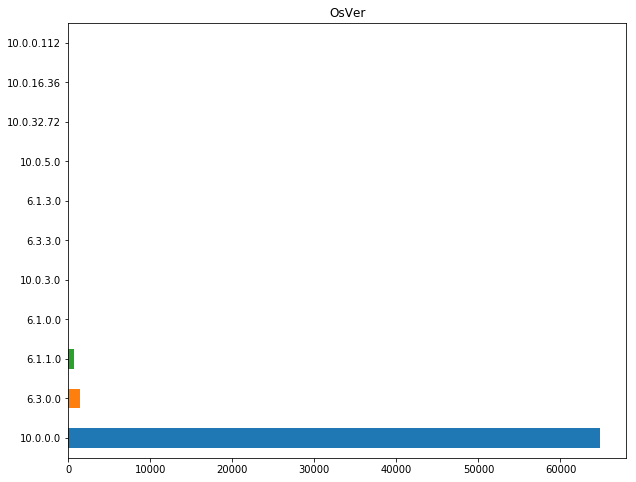

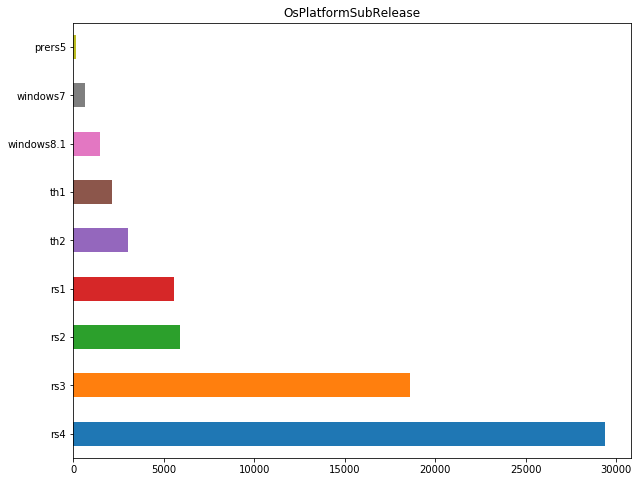

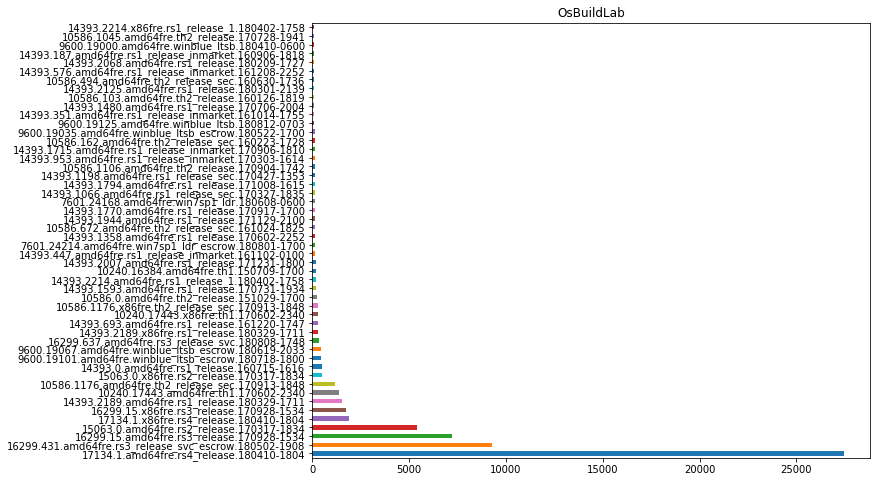

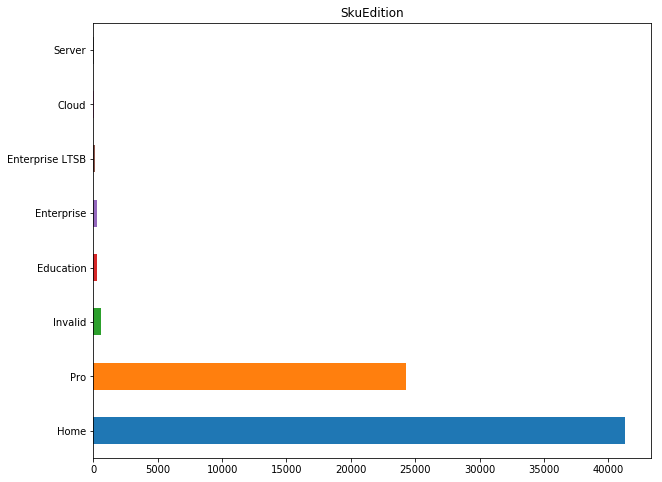

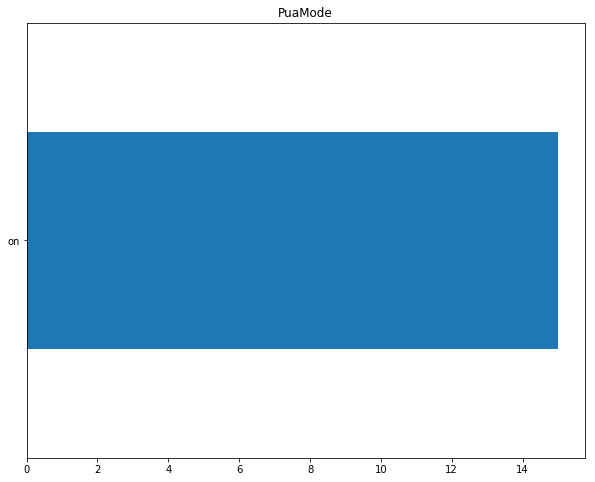

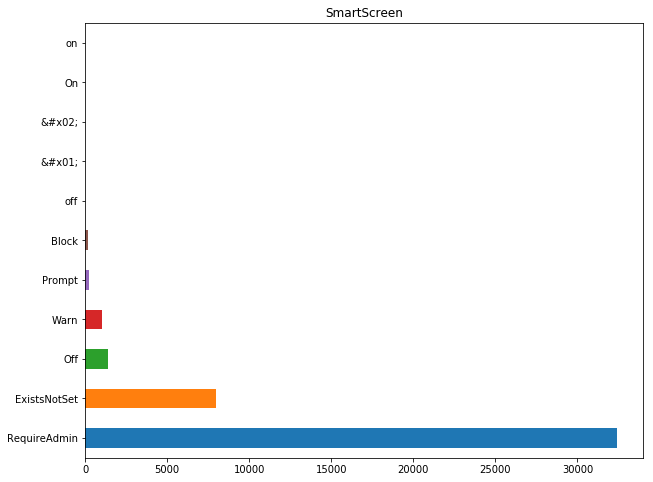

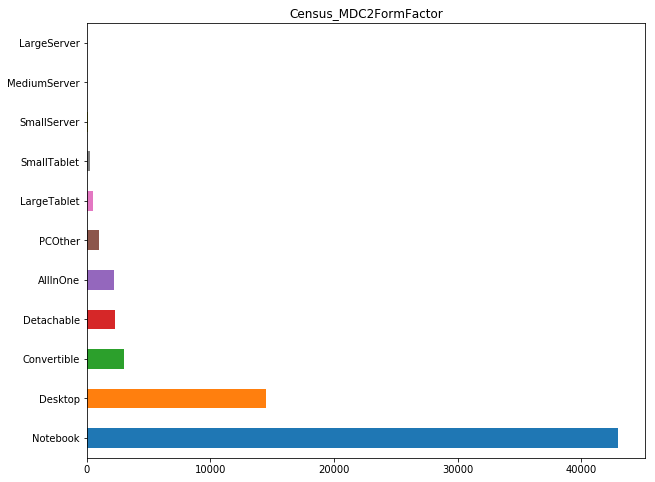

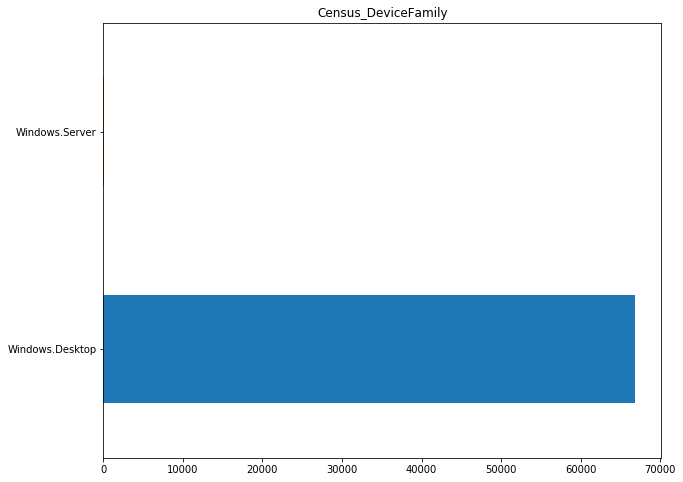

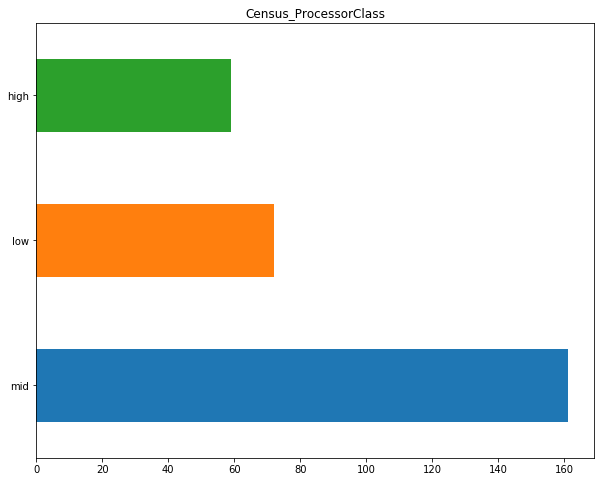

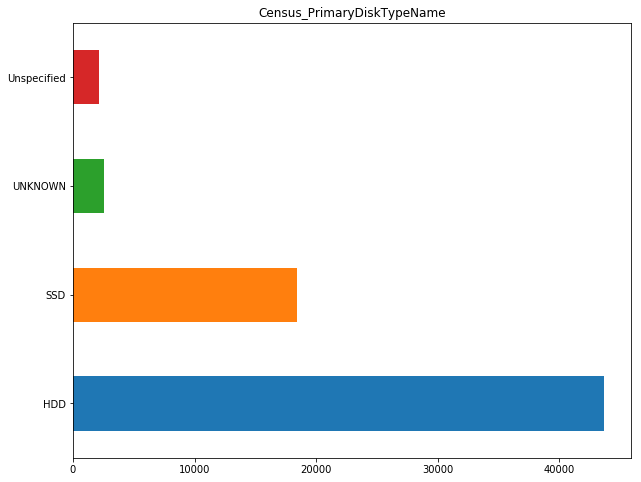

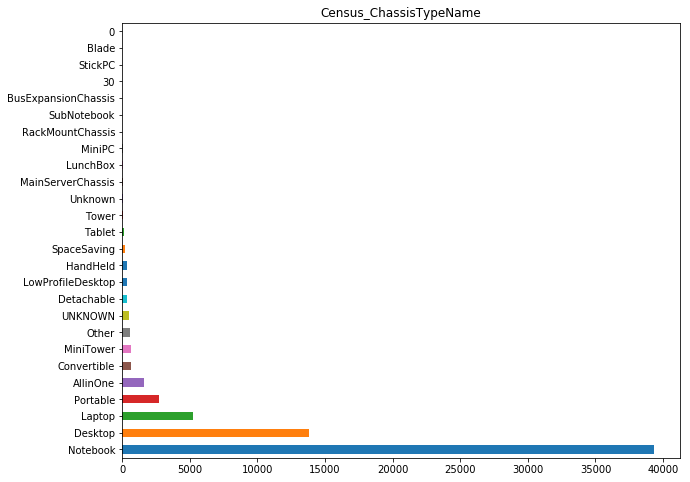

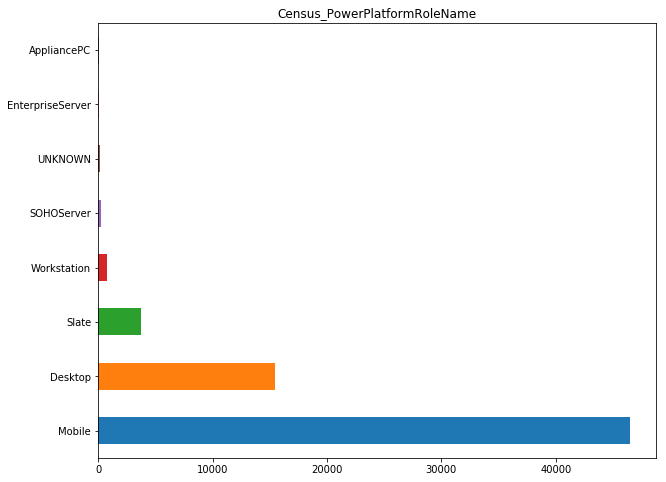

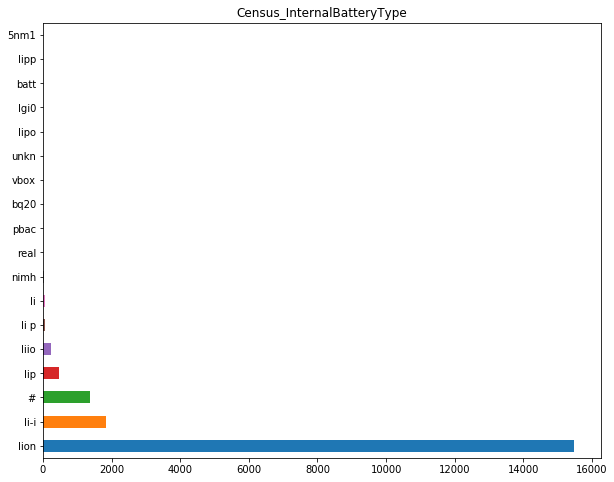

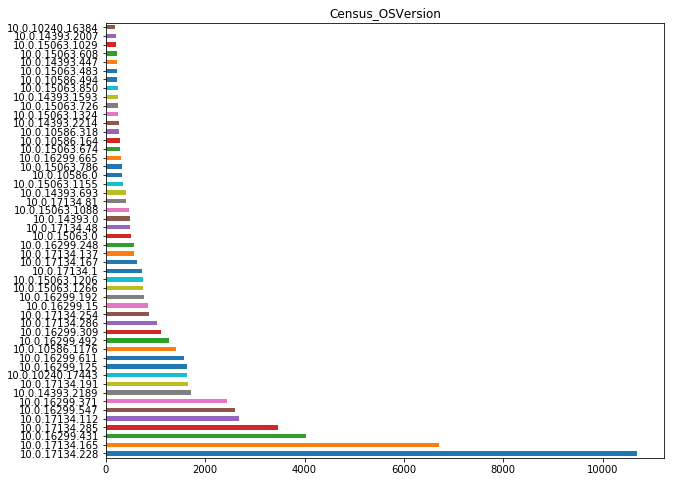

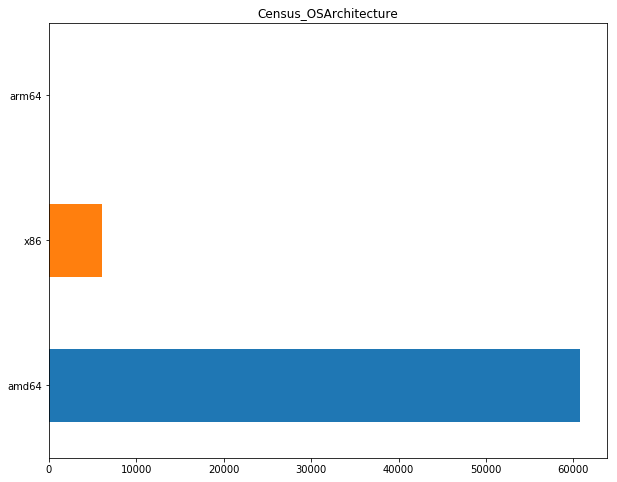

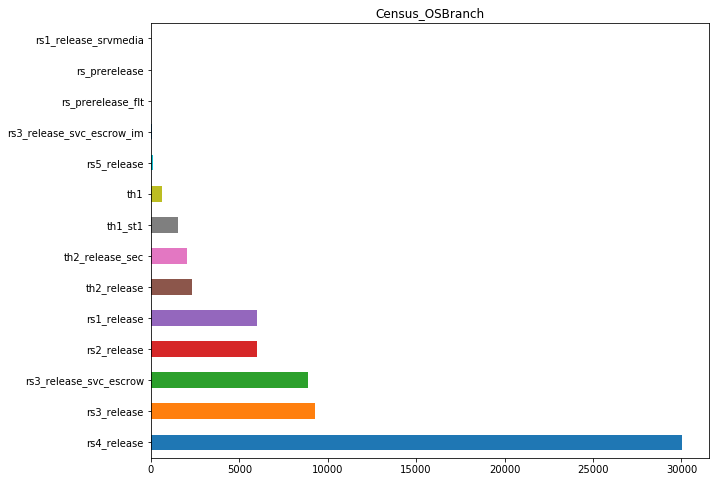

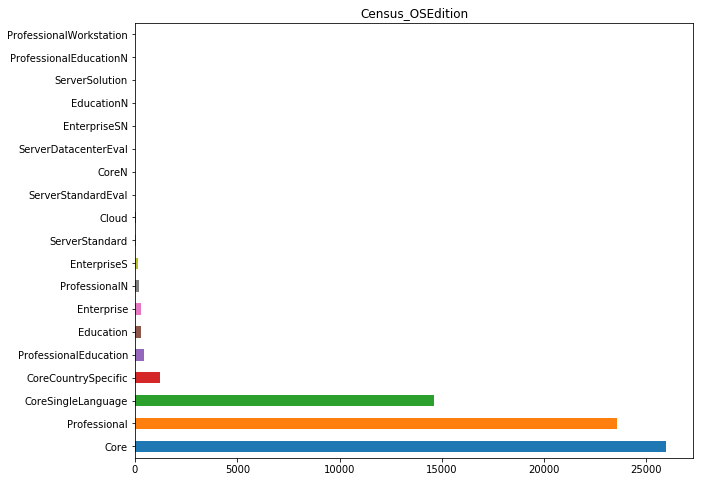

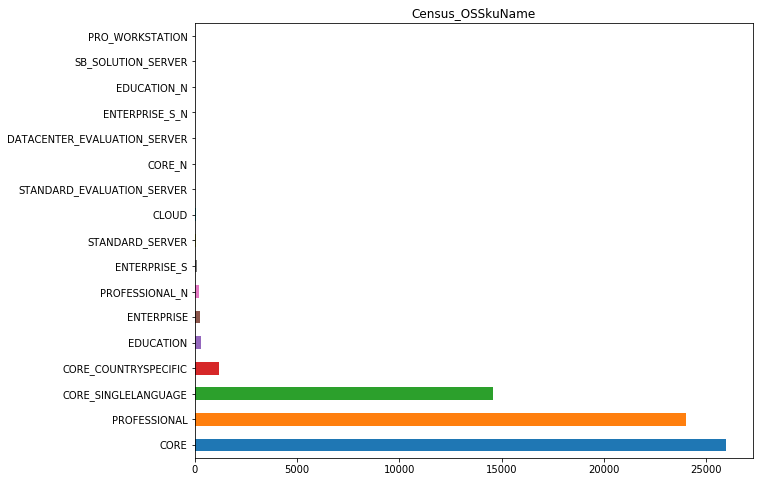

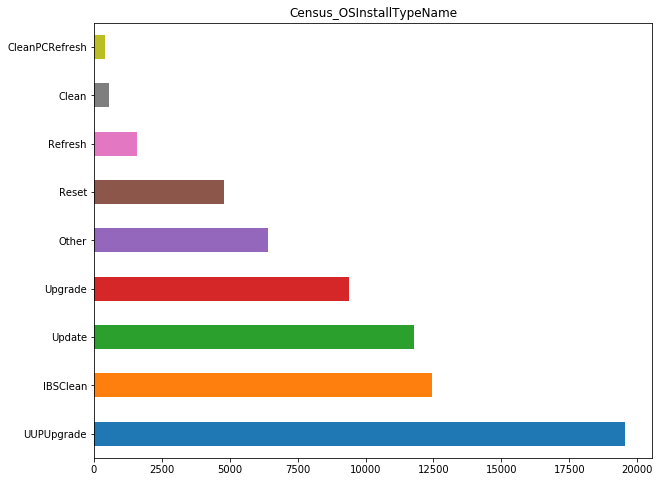

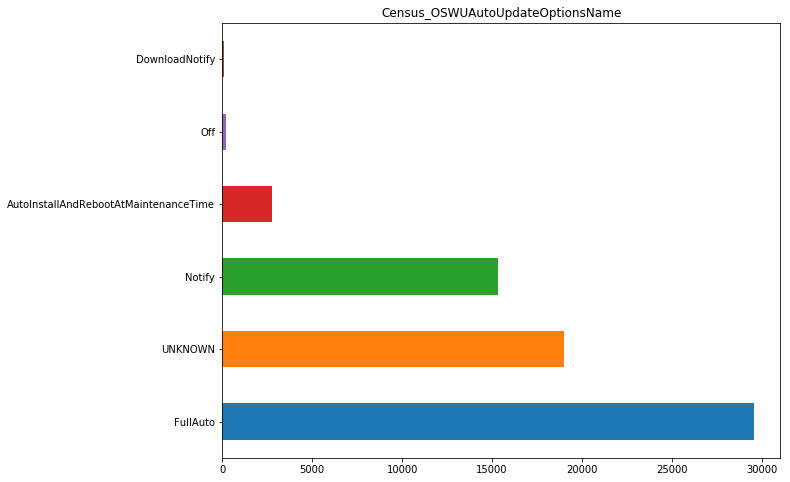

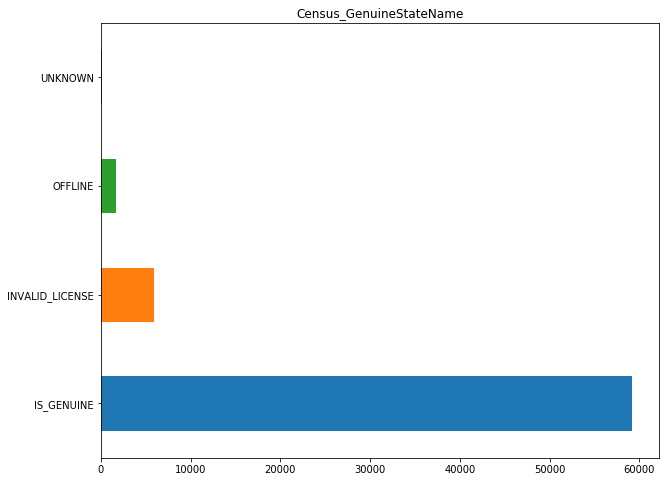

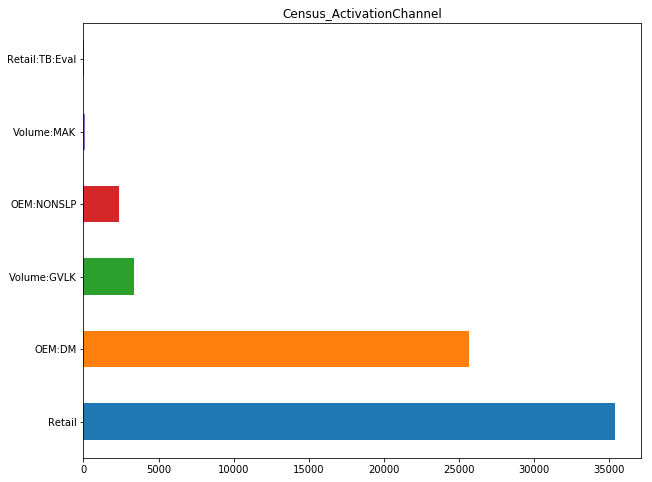

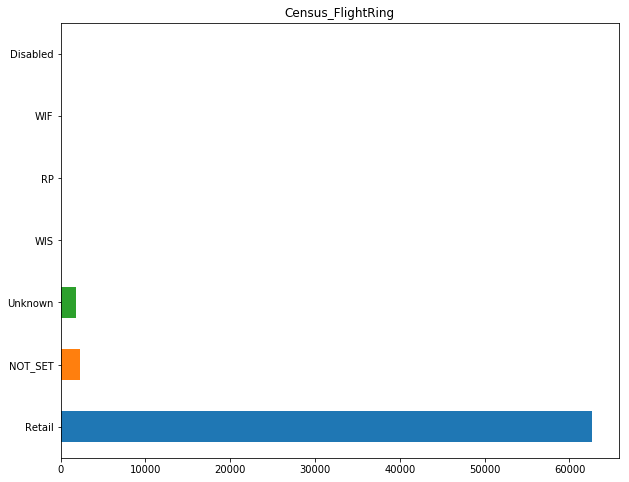

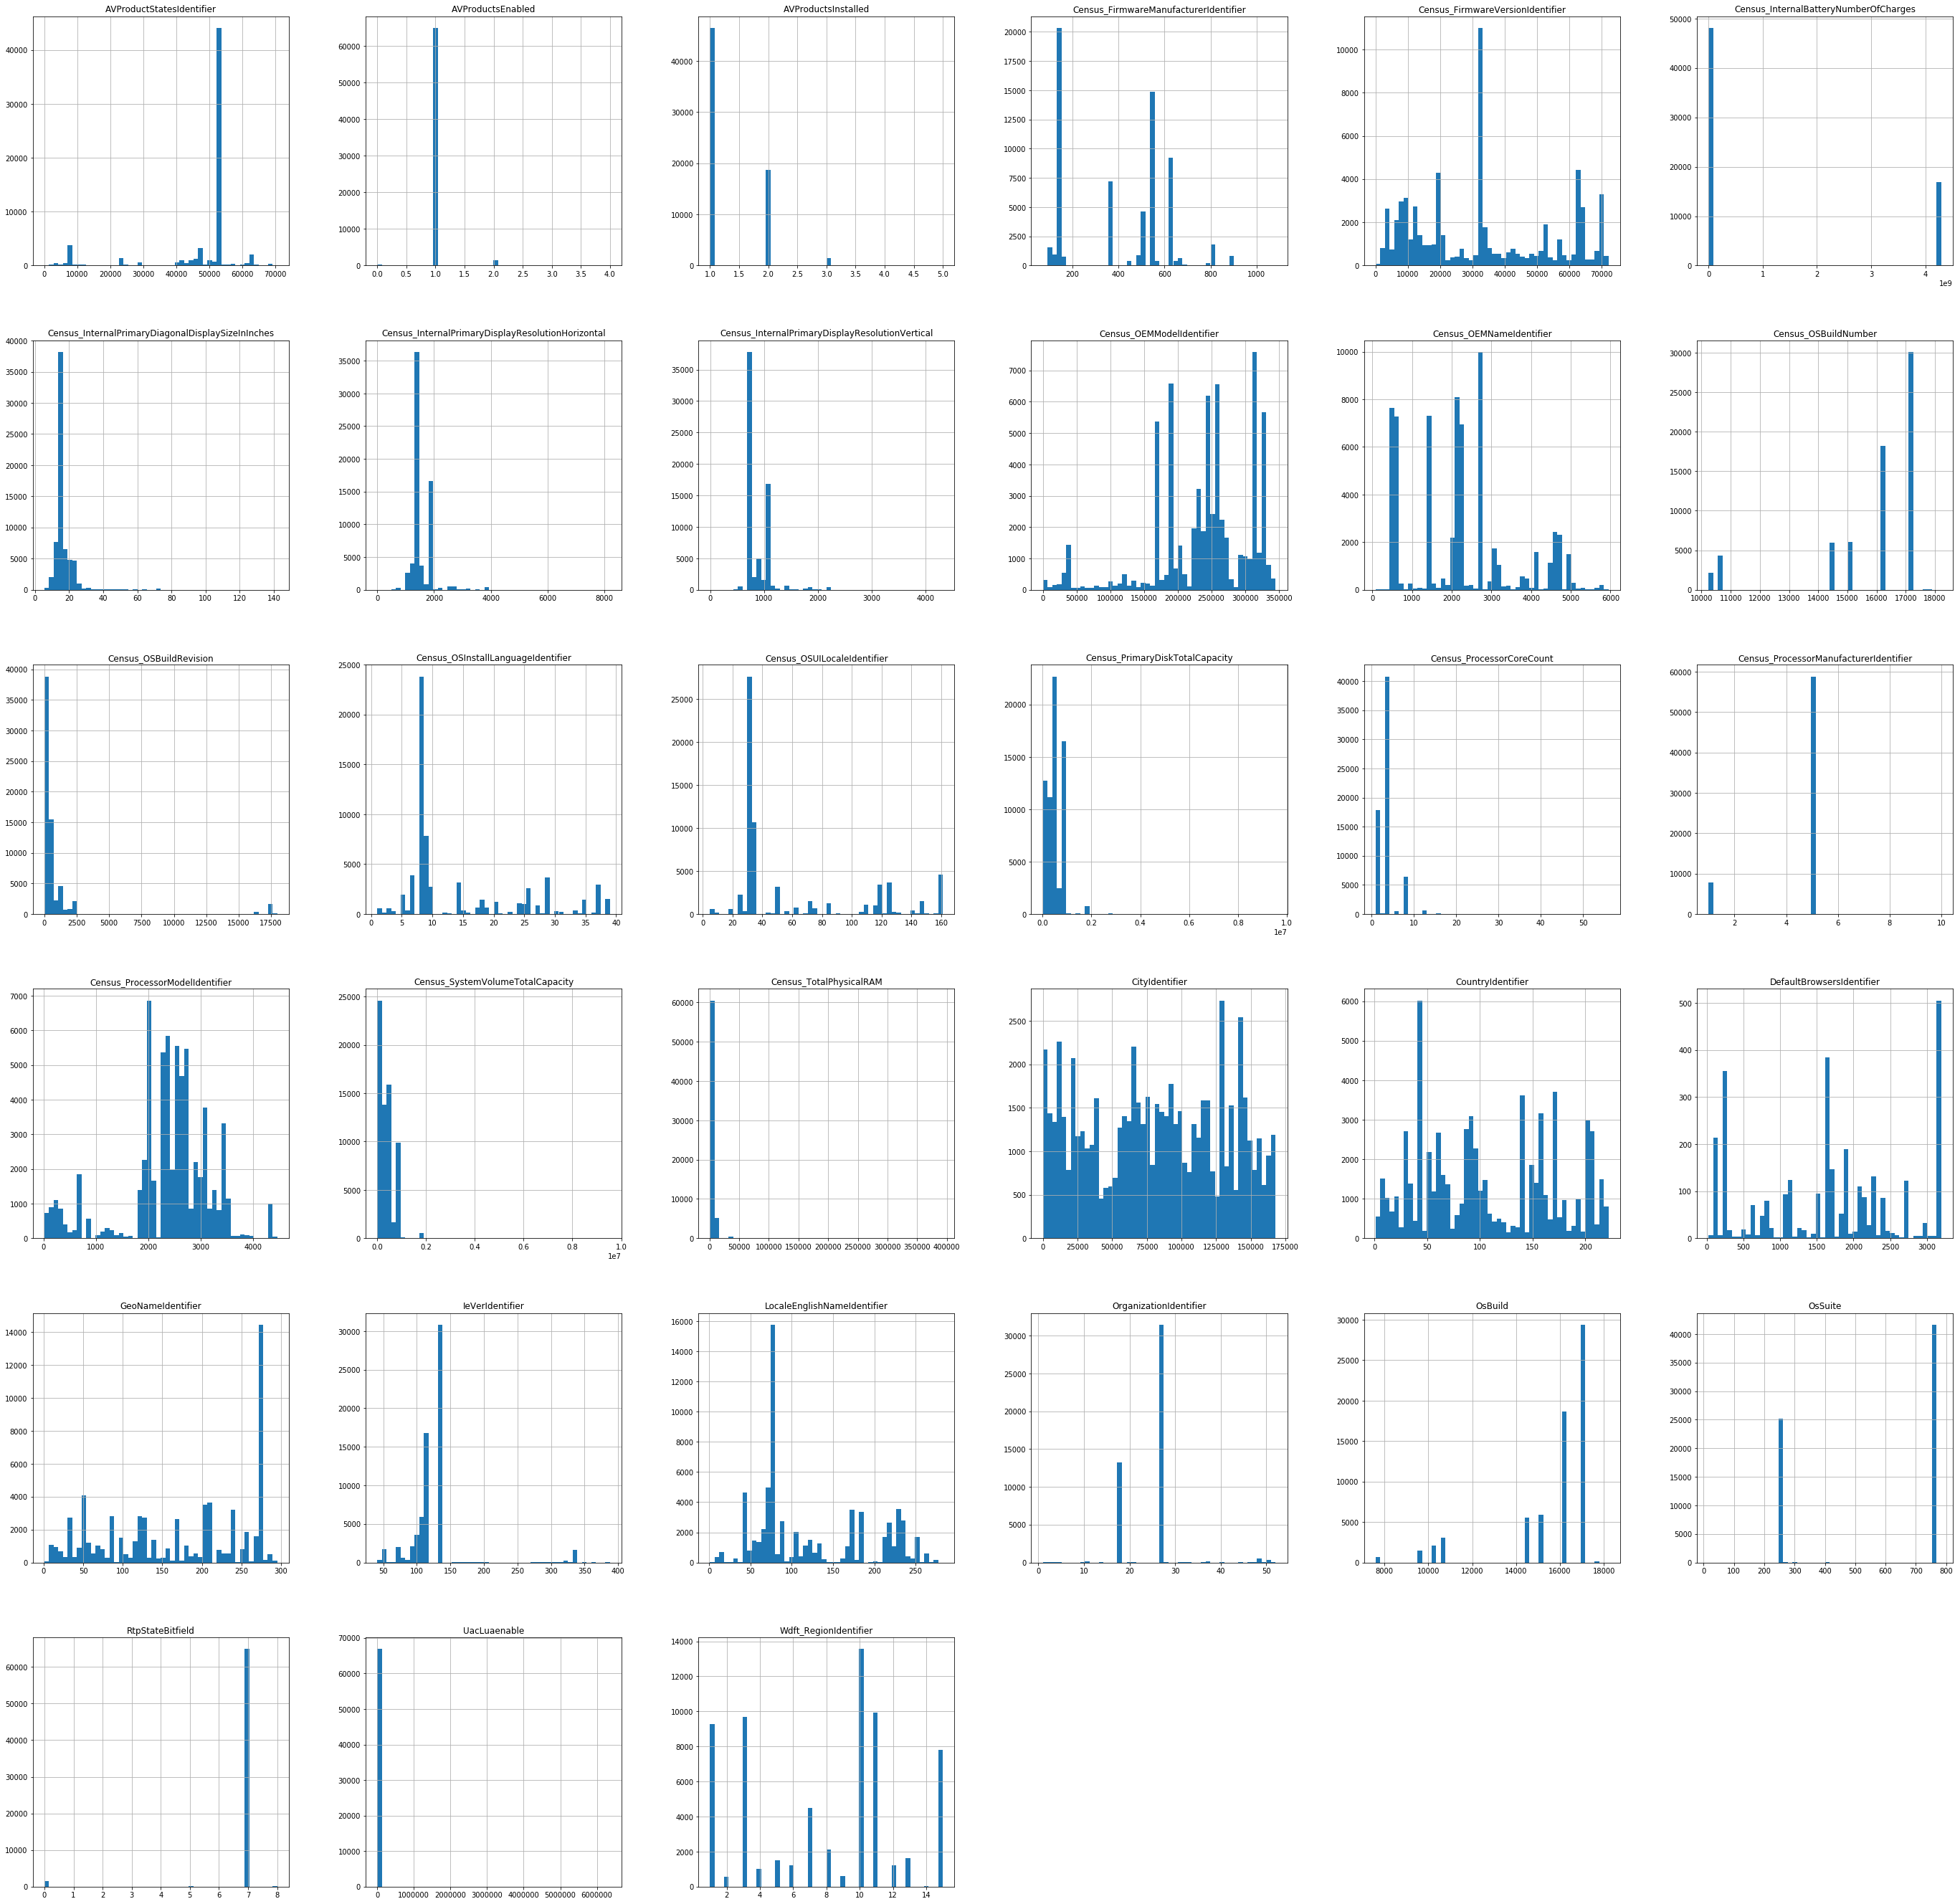

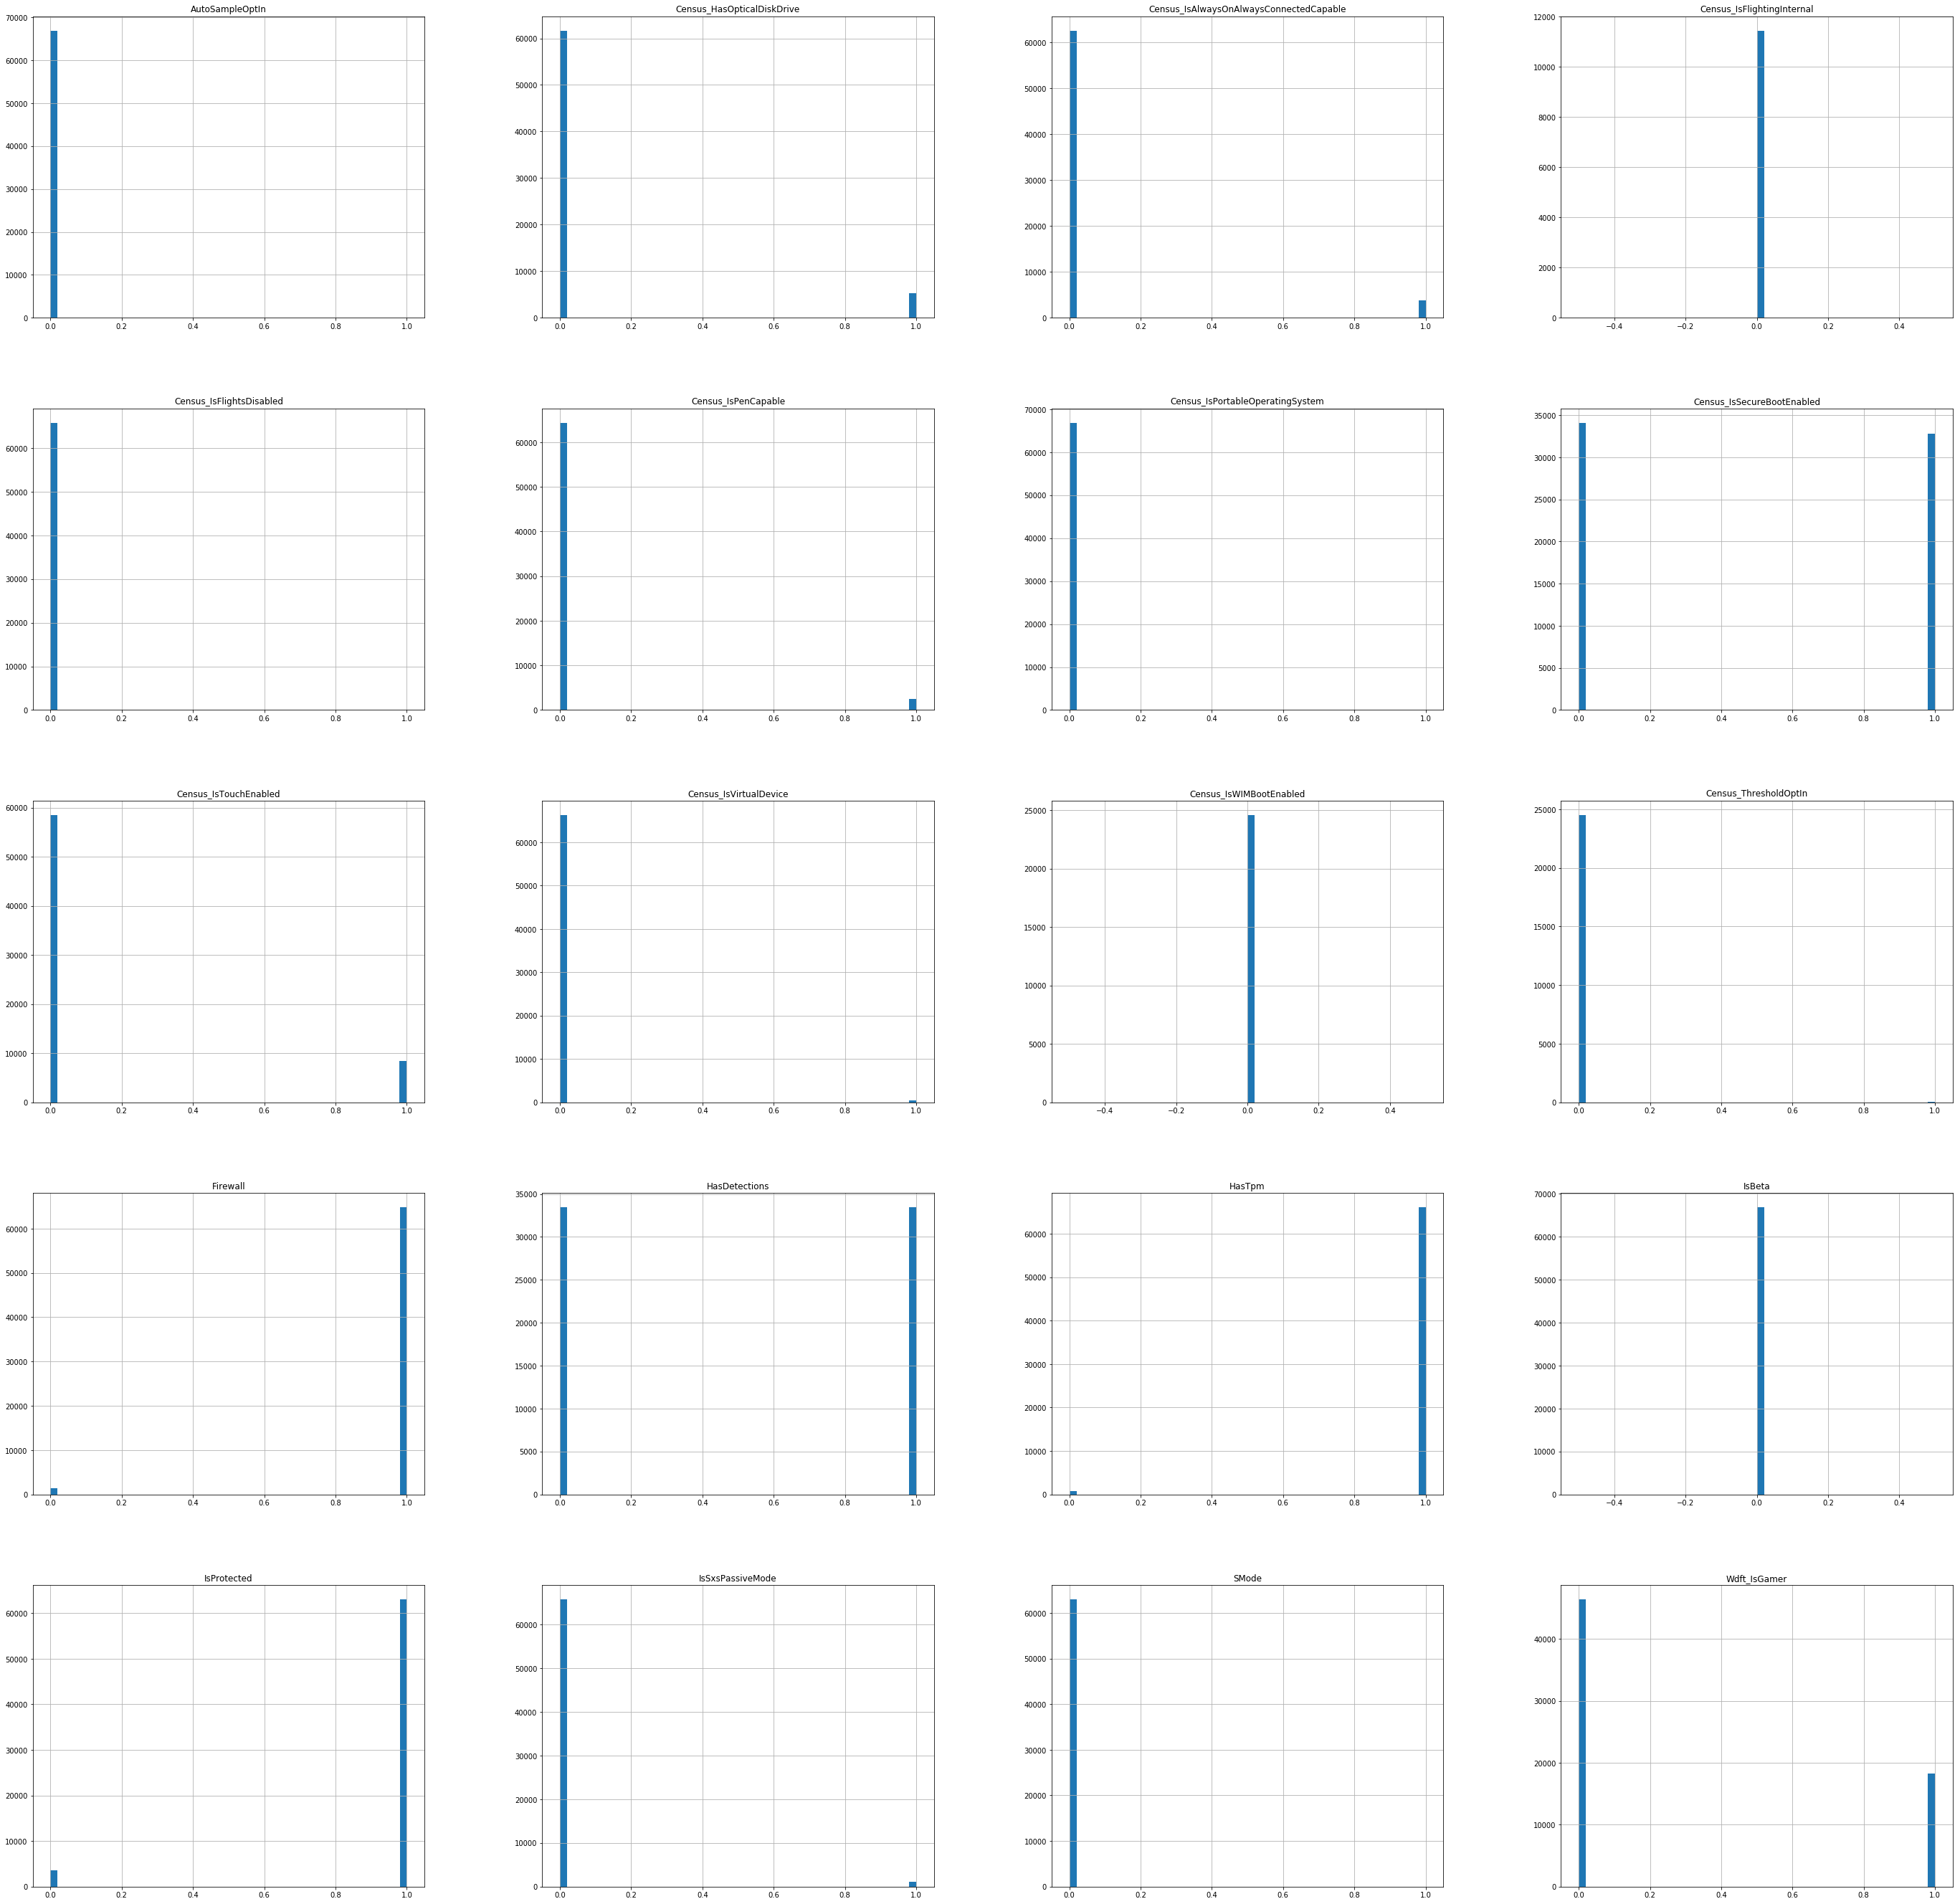

In [44]:
df = load_data("data/mini_initial.csv")
analyze(df)

In [364]:
df = load_data("data/train.csv")
analyze(df)

-- Name: MachineIdentifier                                   Type: object     Count: 8921483 	 Unique: 8921483 	 Missing: False
---- top 50 values:
['0000028988387b115f69f31a3bf04f09' '000007535c3f730efa9ea0b7ef1bd645'
 '000007905a28d863f6d0d597892cd692' '00000b11598a75ea8ba1beea8459149f'
 '000014a5f00daa18e76b81417eeb99fc' '000016191b897145d069102325cab760'
 '0000161e8abf8d8b89c5ab8787fd712b' '000019515bc8f95851aff6de873405e8'
 '00001a027a0ab970c408182df8484fce' '00001a18d69bb60bda9779408dcf02ac'
 '00001b3b3cf8c8c079a272ce51031753' '00001b924fcc6922321cfadbafd8a91a'
 '00001f26e9e5775277d6231fc6ac9e70' '000024872c81cf03fa862aa8f99e0984'
 '0000258d2b847c7549150cfec6464473' '000027c68b89acb49d4017763b043449'
 '000028150912f45b1dc667164de489ef' '00002a7fd74f9ca4a59a679a7cc80388'
 '00002b7454f06444e8d9f6083d8a9ebd' '00002c6cccecdef94aaa557d0458ab8a'
 '0000309dcbba938f8aa7ee5a0204119d' '000033565d8f7a3029afd1d6c4c465e9'
 '0000378813e163d00d5e5f7e0a12b6d9' '000037f84e21c83328ba6963cdac497b'


In [366]:
df = load_data("data/test.csv")
analyze(df)

-- Name: MachineIdentifier                                   Type: object     Count: 7853253 	 Unique: 7853253 	 Missing: False
---- top 50 values:
['0000010489e3af074adeac69c53e555e' '00000176ac758d54827acd545b6315a5'
 '0000019dcefc128c2d4387c1273dae1d' '0000055553dc51b1295785415f1a224d'
 '00000574cefffeca83ec8adf9285b2bf' '000007ffedd31948f08e6c16da31f6d1'
 '000008f31610018d898e5f315cdf1bd1' '00000a3c447250626dbcc628c9cbc460'
 '00000b6bf217ec9aef0f68d5c6705897' '00000b8d3776b13e93ad83676a28e4aa'
 '00000dec341e29f26b92c3be03640bdc' '00000e658ce75c1e2a3bb47bcc3b08f3'
 '0000102ff65968bbdc04b69073434b05' '000011236a5dc4ff119541c42bb4287e'
 '0000124d8811c1a5b5848c4d730cfbf8' '000015a88b949c982bc80ec8e32b726d'
 '0000187a73c37cab54bd5be81c16c71f' '00001be80a499e95d5e68151b6470aa2'
 '00001dcfc3f82d68d6eae9cad4a3e07c' '00001ec5ccb1deb10e7f9facb5738bbb'
 '00001fb4bab6f49153f8b8a8cad33557' '00001fb68068b9612b7bcc8e5dd07da7'
 '0000208f0145e1b831c508fd33f4e66a' '000022cd46c5714e86254b4133116bb7'


-- Name: ProductName                                         Type: object     Count: 16774736 	 Unique: 6 	 Missing: False
---- top 50 values:
['fep' 'mse' 'mseprerelease' 'scep' 'win8defender' 'windowsintune']
-- Name: EngineVersion                                       Type: object     Count: 16774736 	 Unique: 74 	 Missing: False
---- top 50 values:
['1.1.10302.0' '1.1.10401.0' '1.1.10701.0' '1.1.11104.0' '1.1.11202.0'
 '1.1.11302.0' '1.1.11400.0' '1.1.11502.0' '1.1.11602.0' '1.1.11701.0'
 '1.1.11804.0' '1.1.11903.0' '1.1.12002.0' '1.1.12101.0' '1.1.12205.0'
 '1.1.12300.0' '1.1.12400.0' '1.1.12505.0' '1.1.12603.0' '1.1.12706.0'
 '1.1.12802.0' '1.1.12804.0' '1.1.12805.0' '1.1.12902.0' '1.1.13000.0'
 '1.1.13102.0' '1.1.13103.0' '1.1.13202.0' '1.1.13301.0' '1.1.13303.0'
 '1.1.13406.0' '1.1.13407.0' '1.1.13503.0' '1.1.13504.0' '1.1.13601.0'
 '1.1.13701.0' '1.1.13704.0' '1.1.13802.0' '1.1.13803.0' '1.1.13804.0'
 '1.1.13902.0' '1.1.13903.0' '1.1.14001.0' '1.1.14002.0' '1.1.14003.0'
 '1.1.

/Users/kevin/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/kevin/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/kevin/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly 

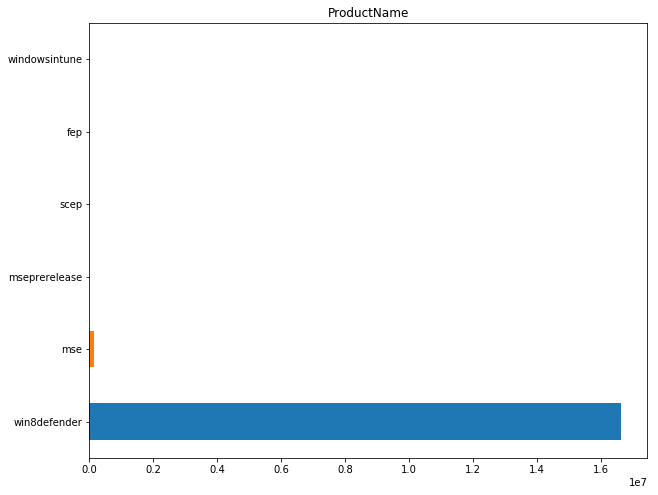

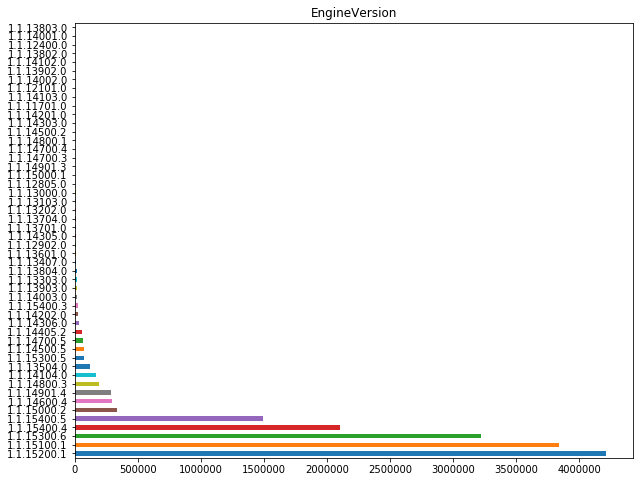

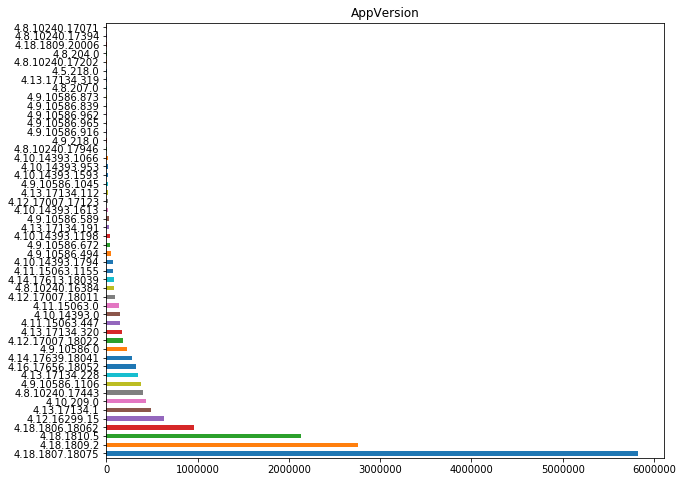

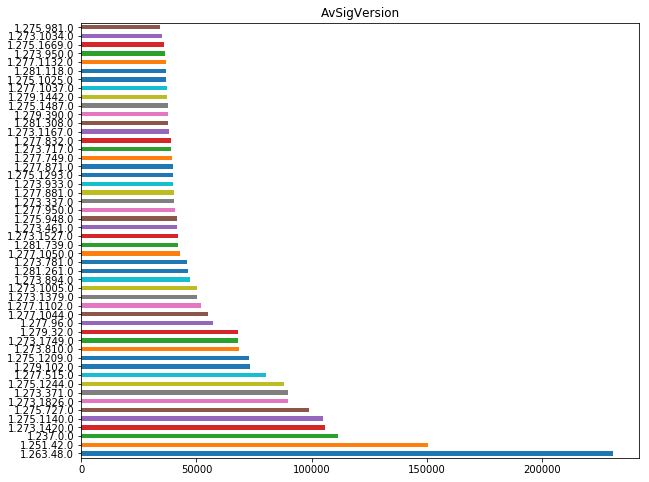

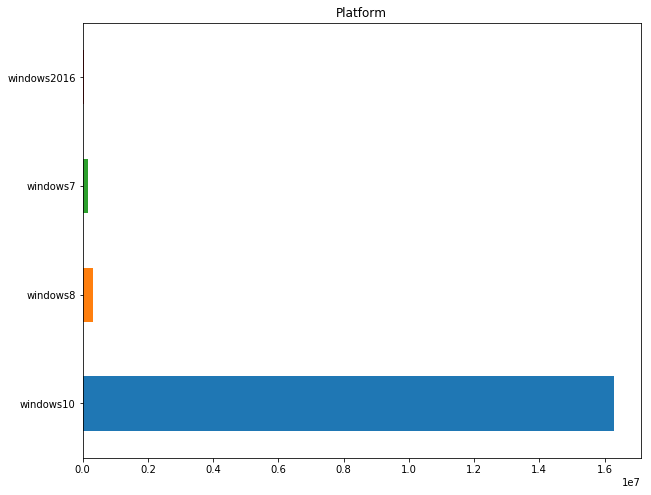

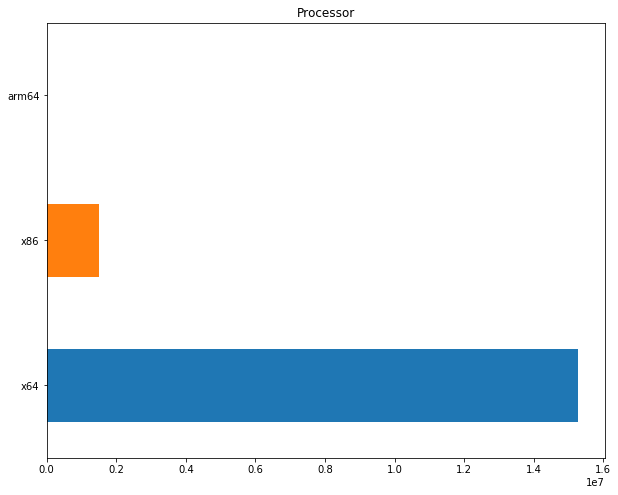

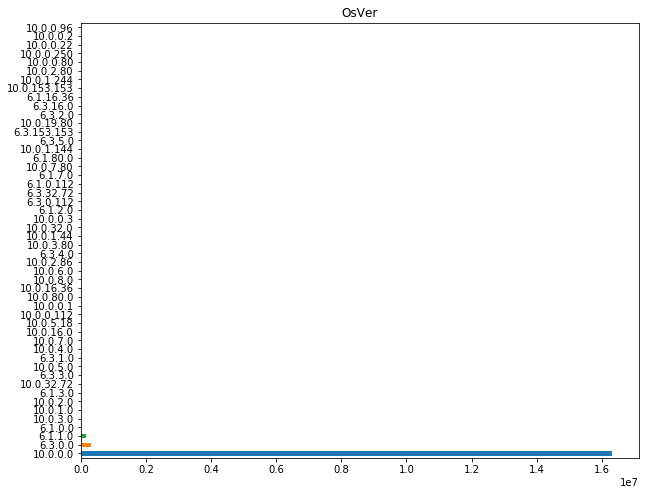

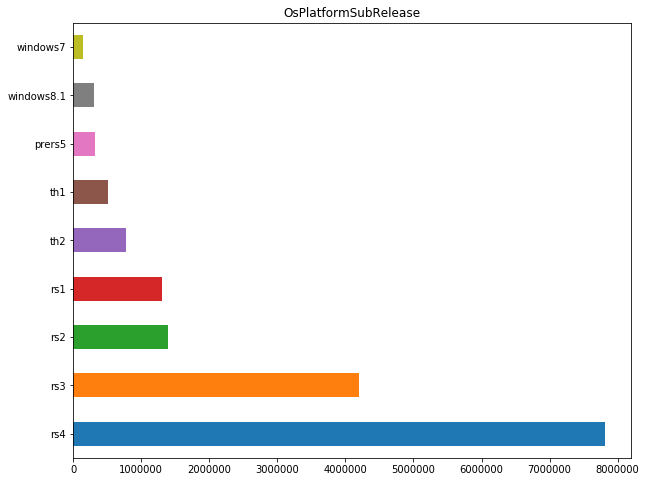

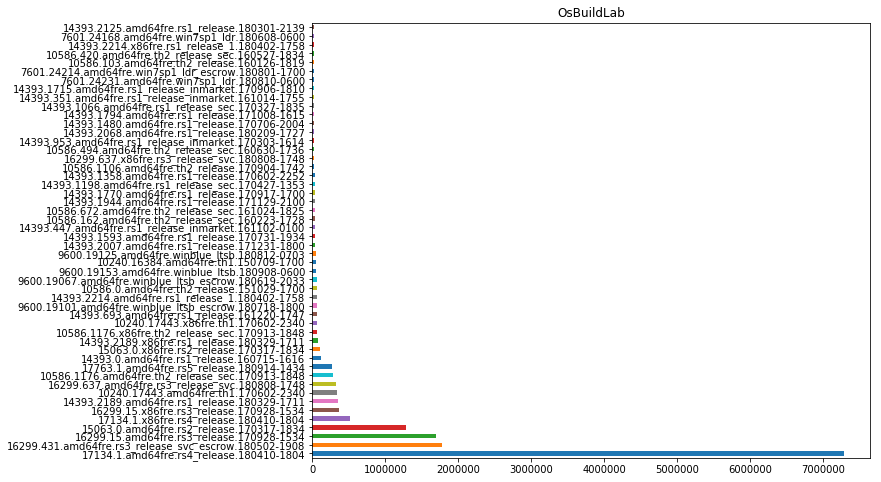

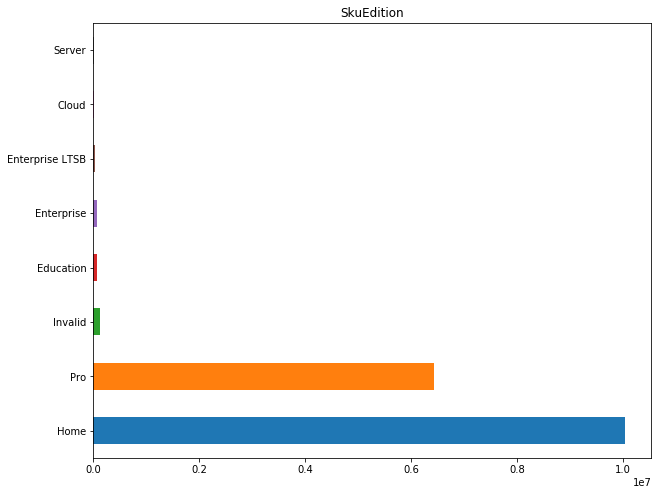

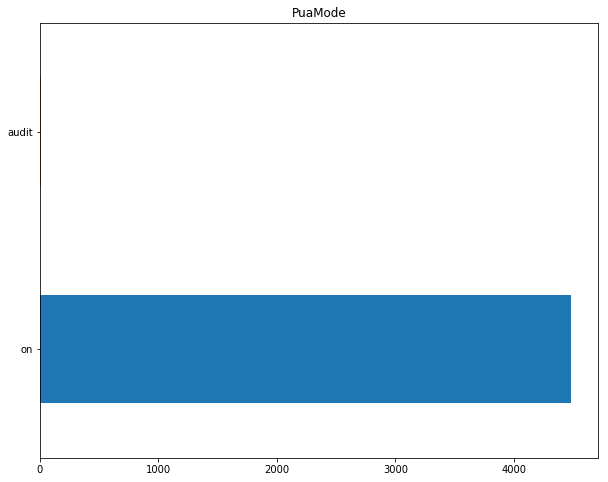

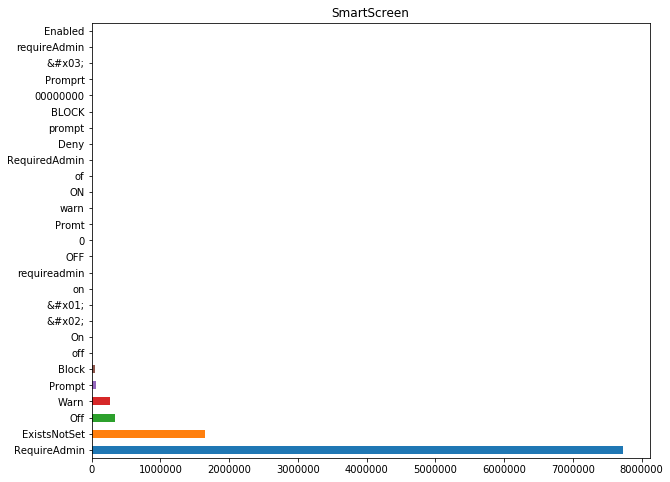

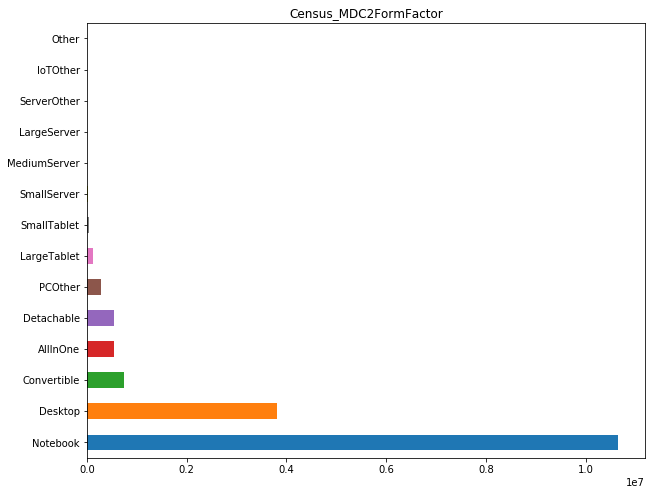

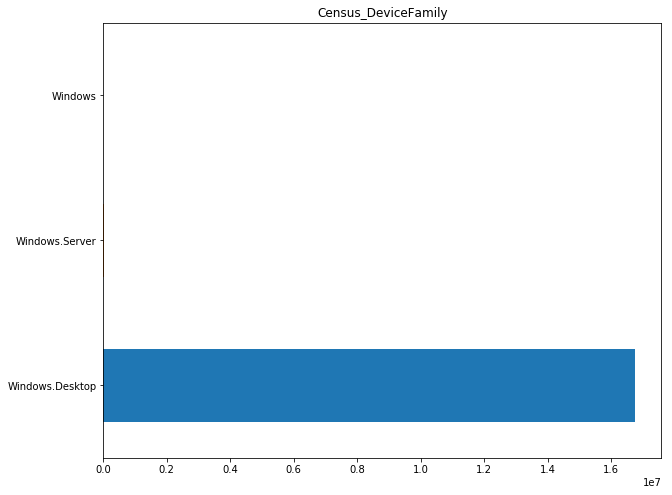

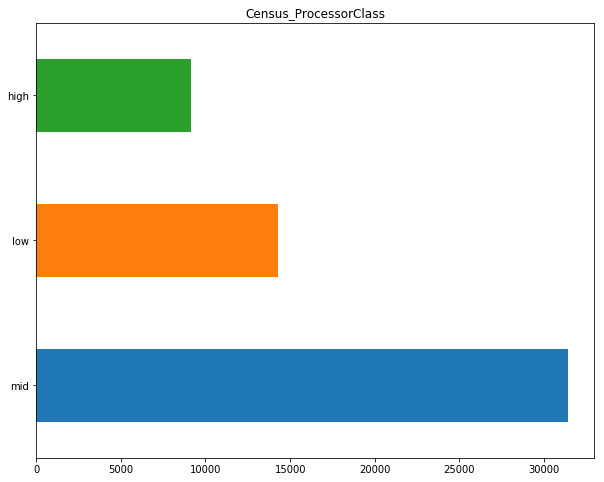

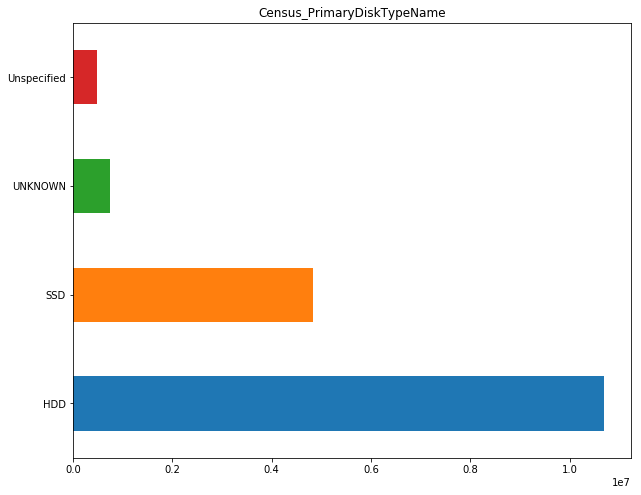

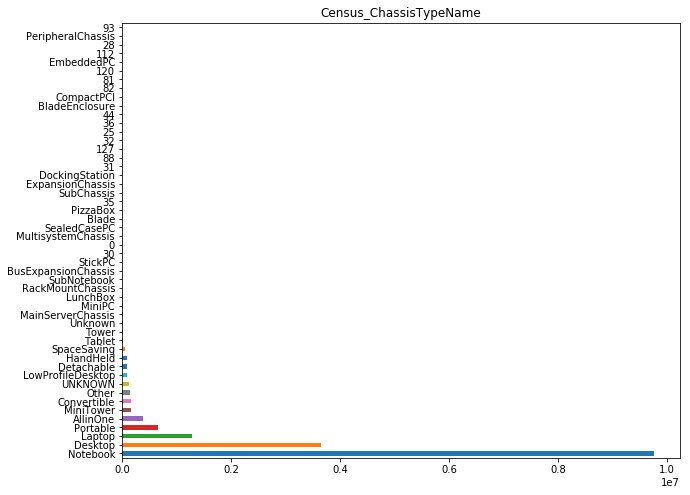

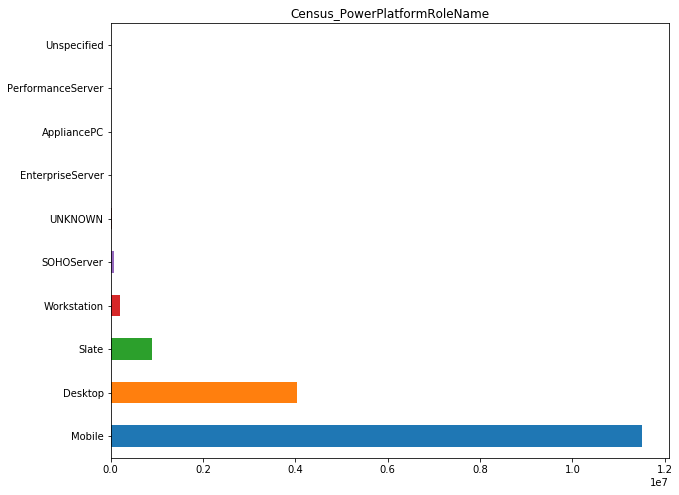

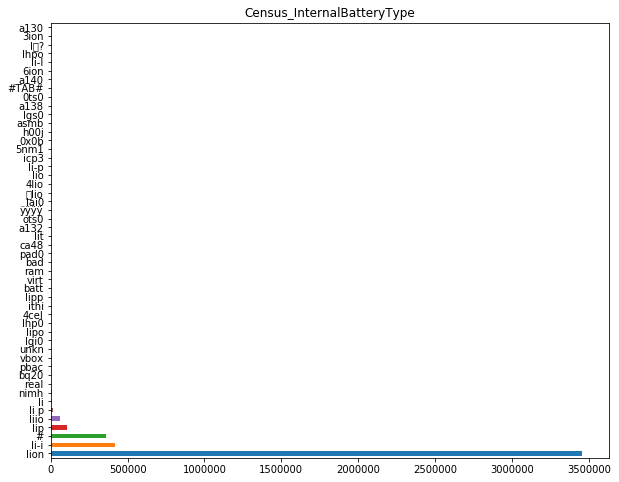

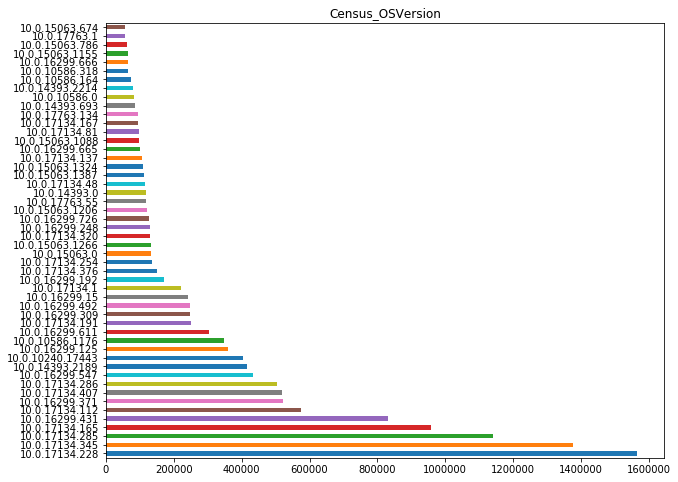

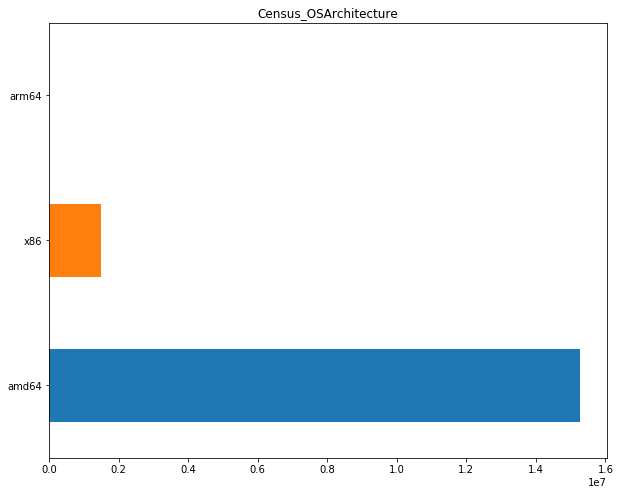

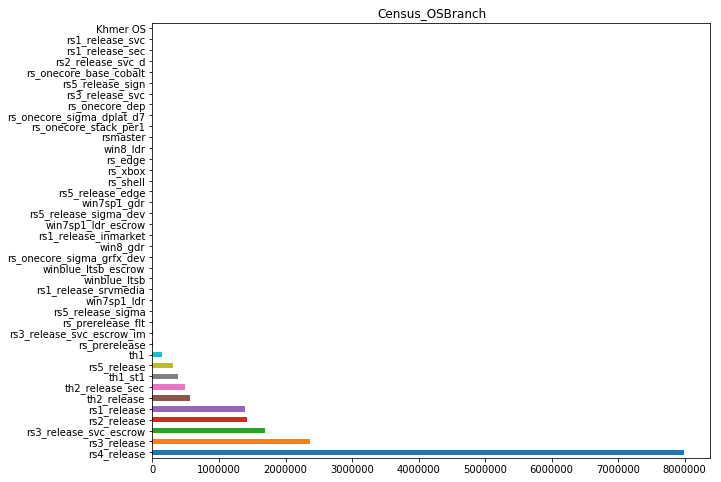

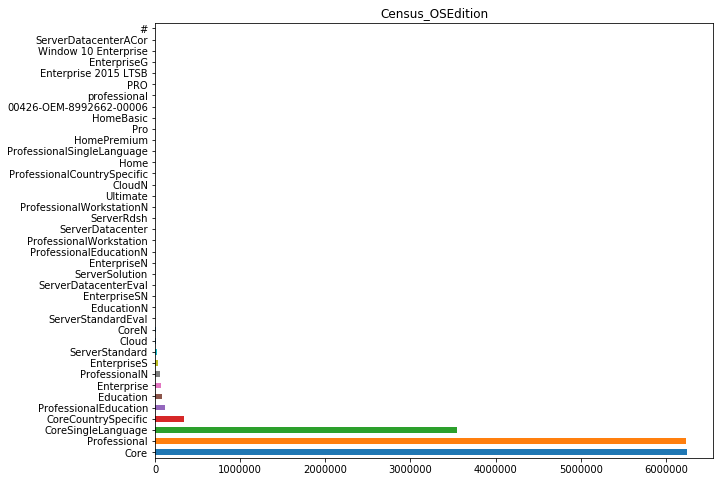

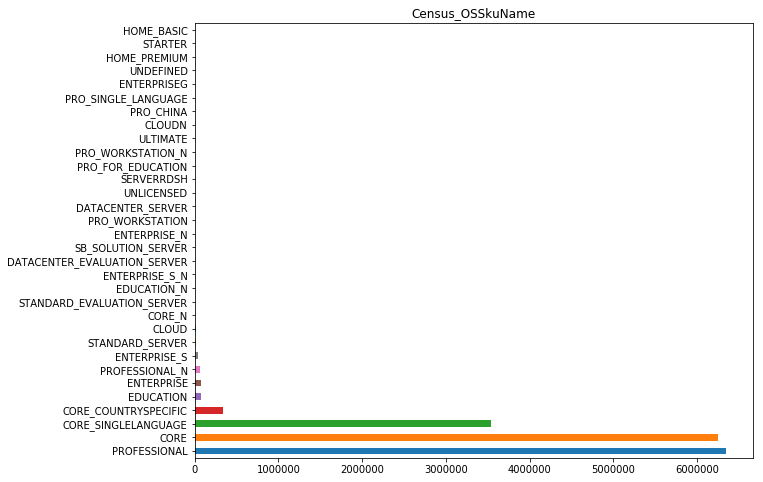

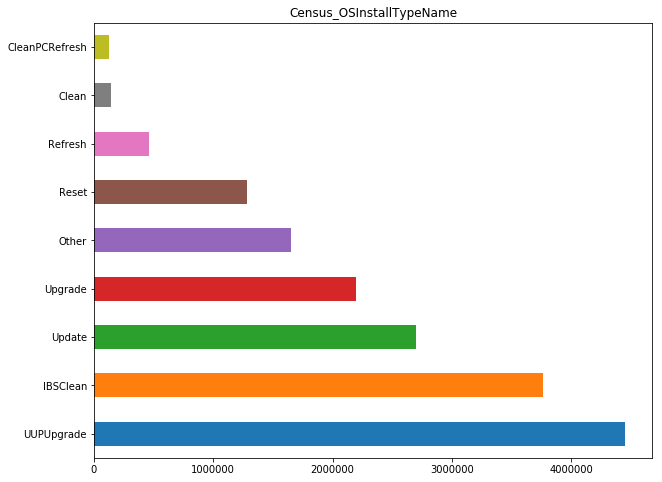

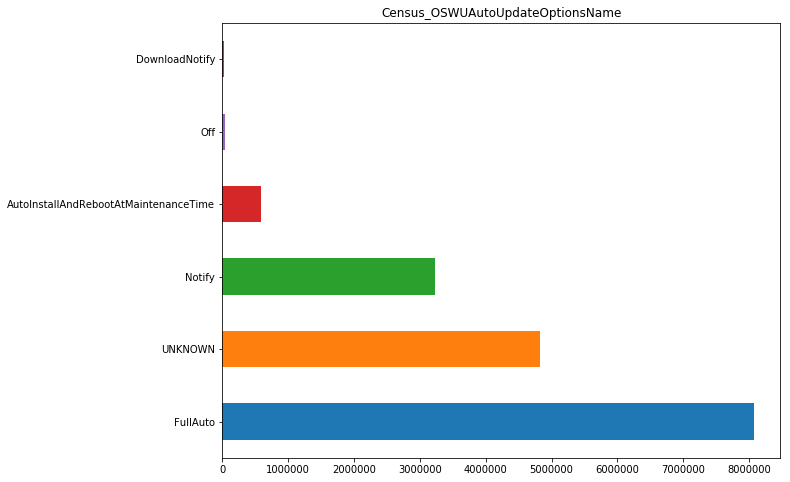

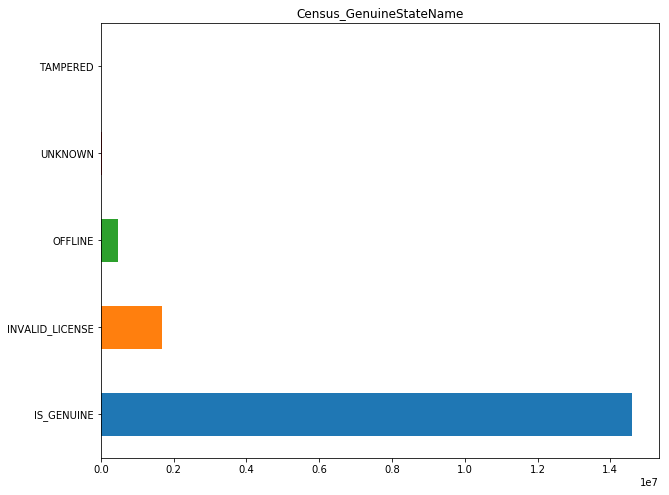

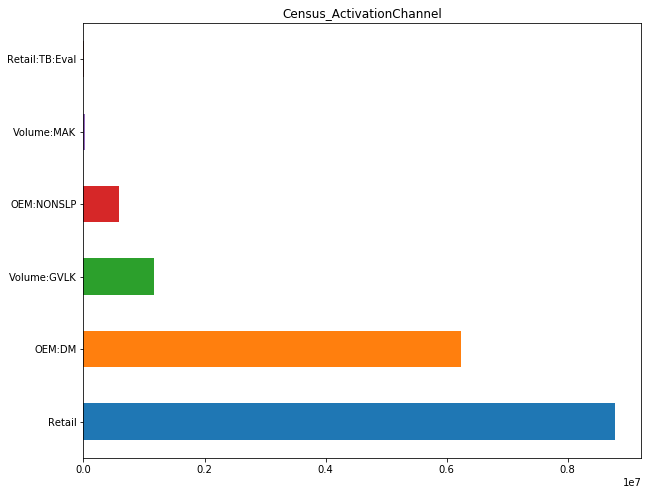

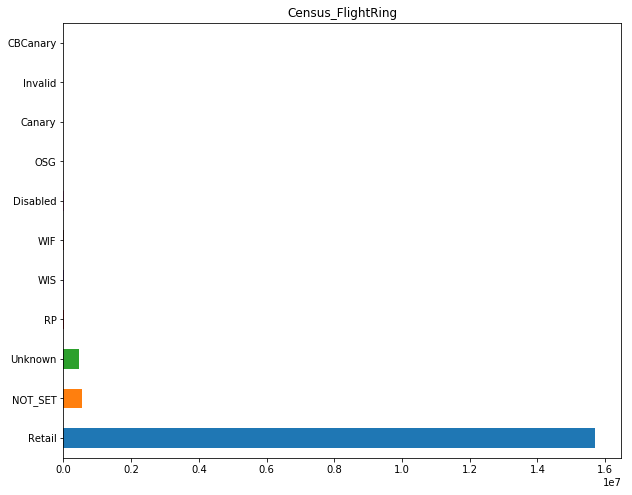

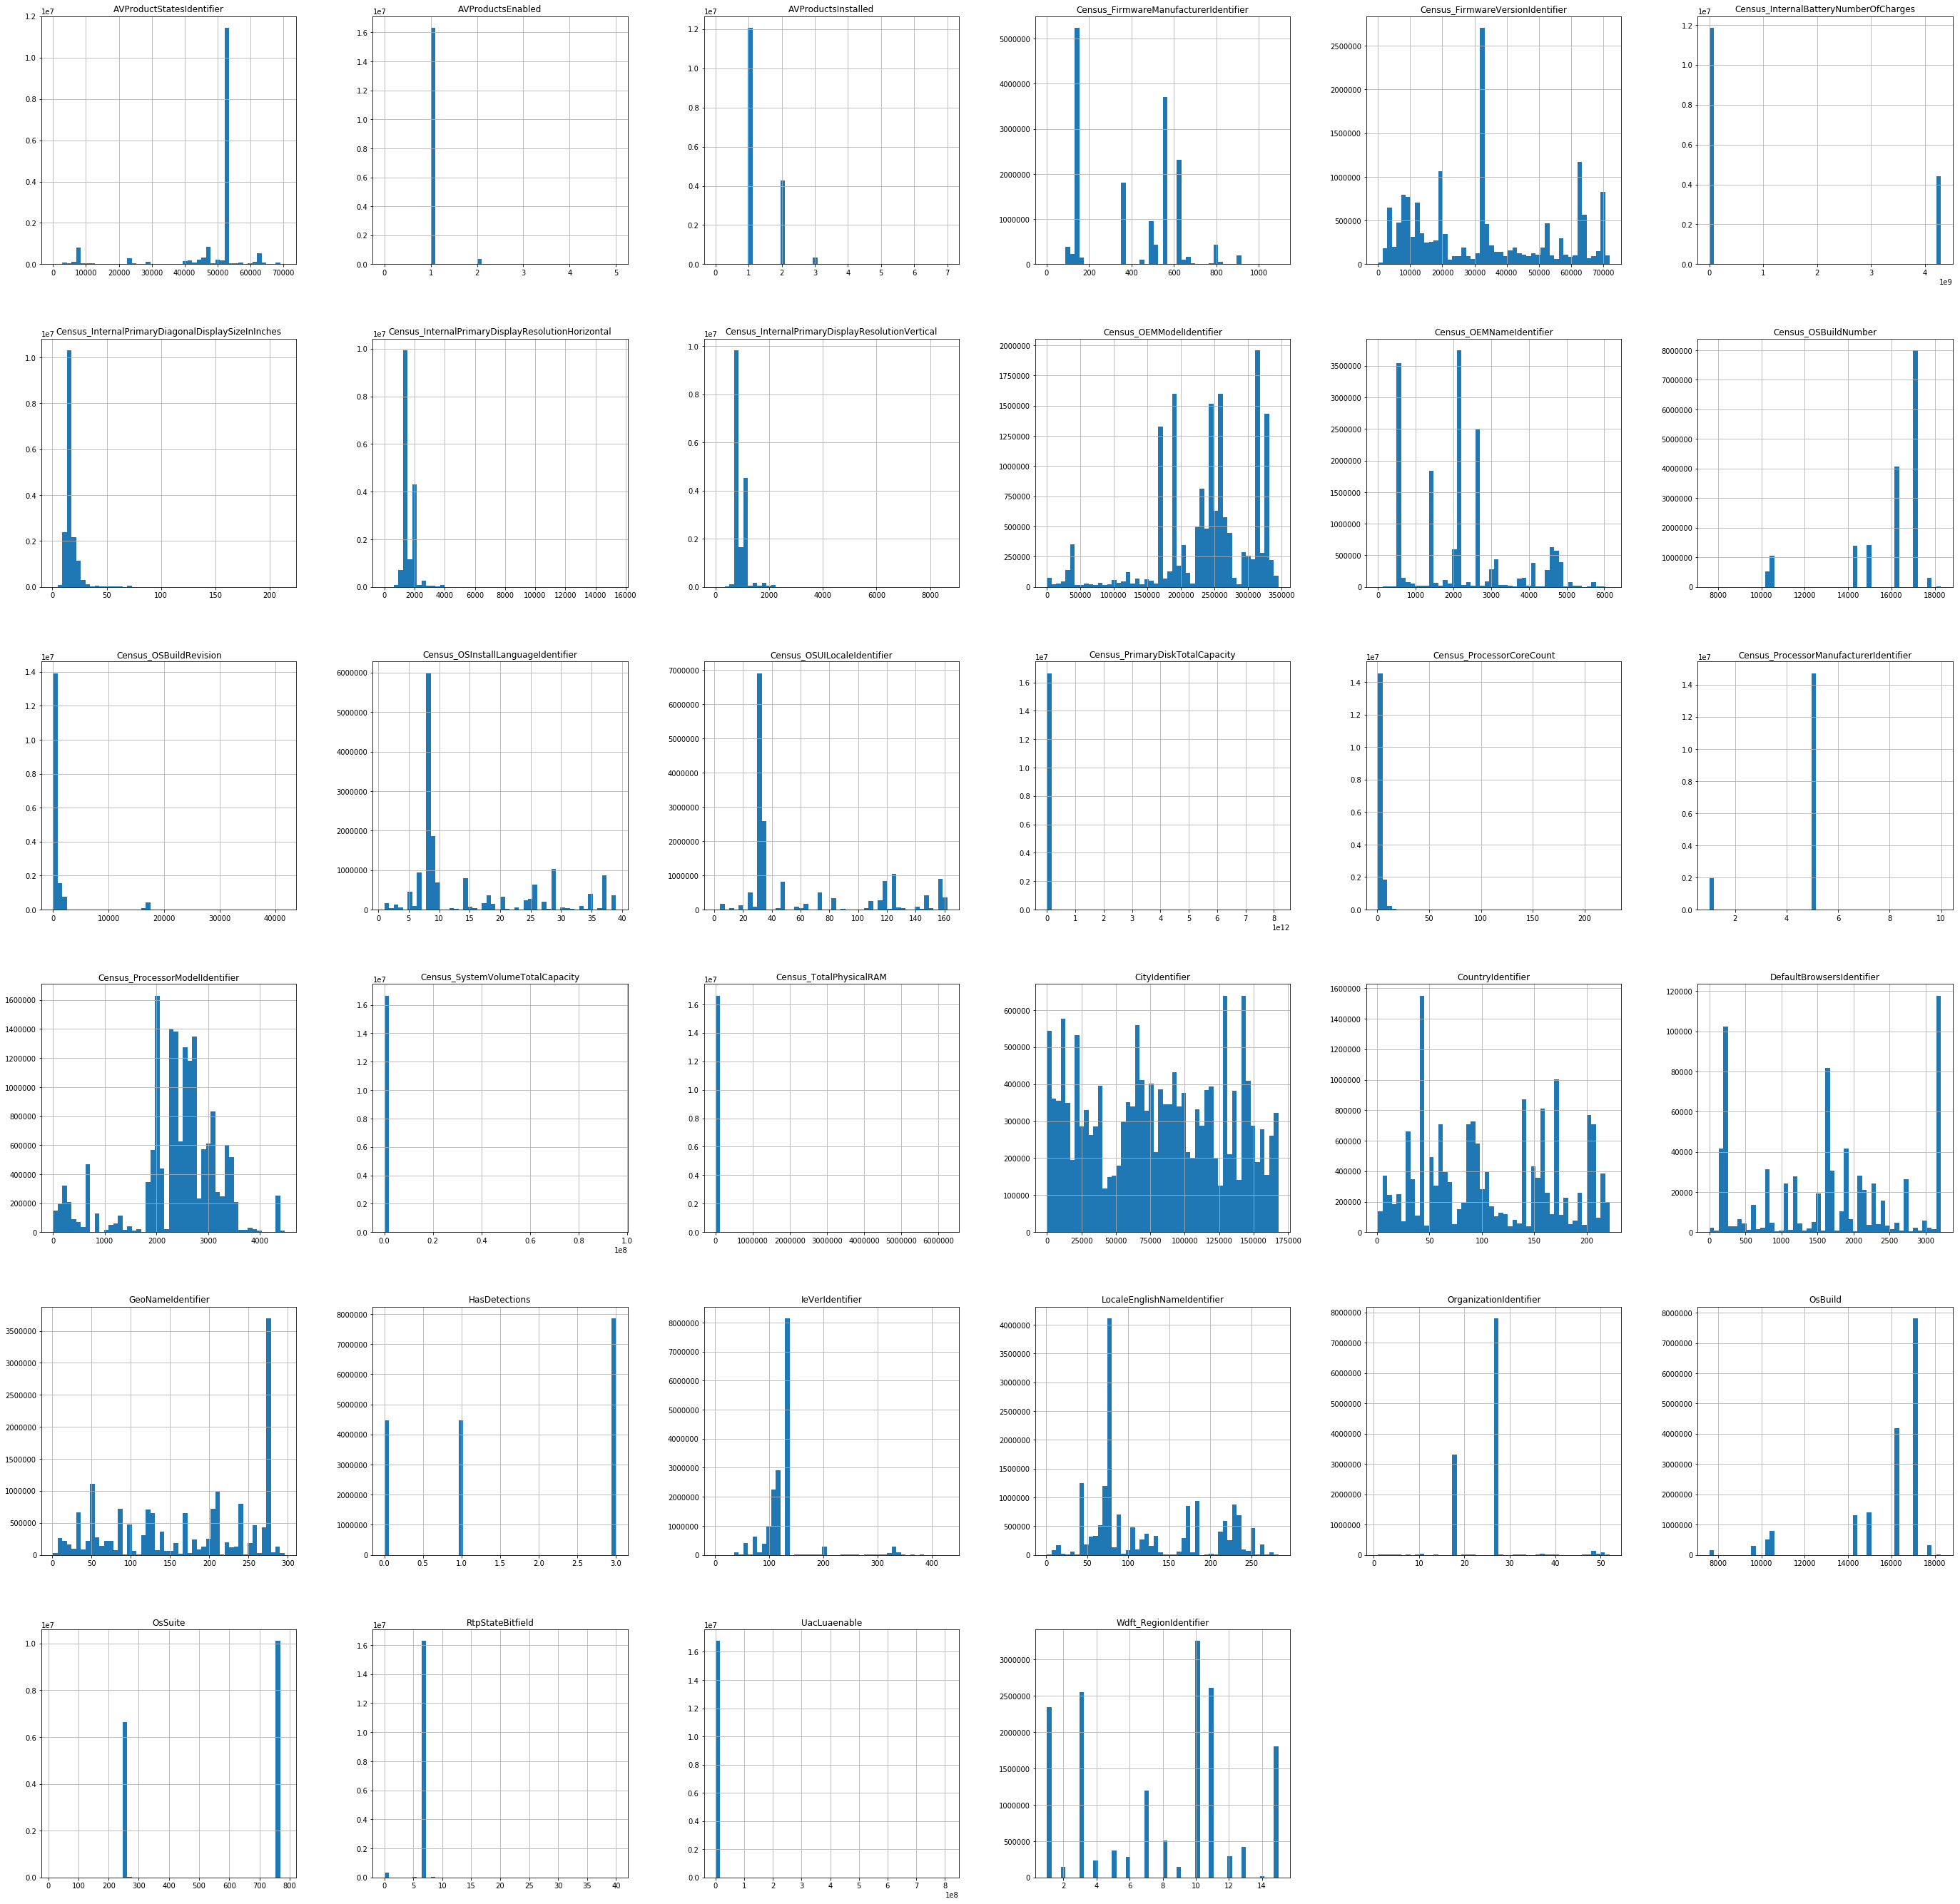

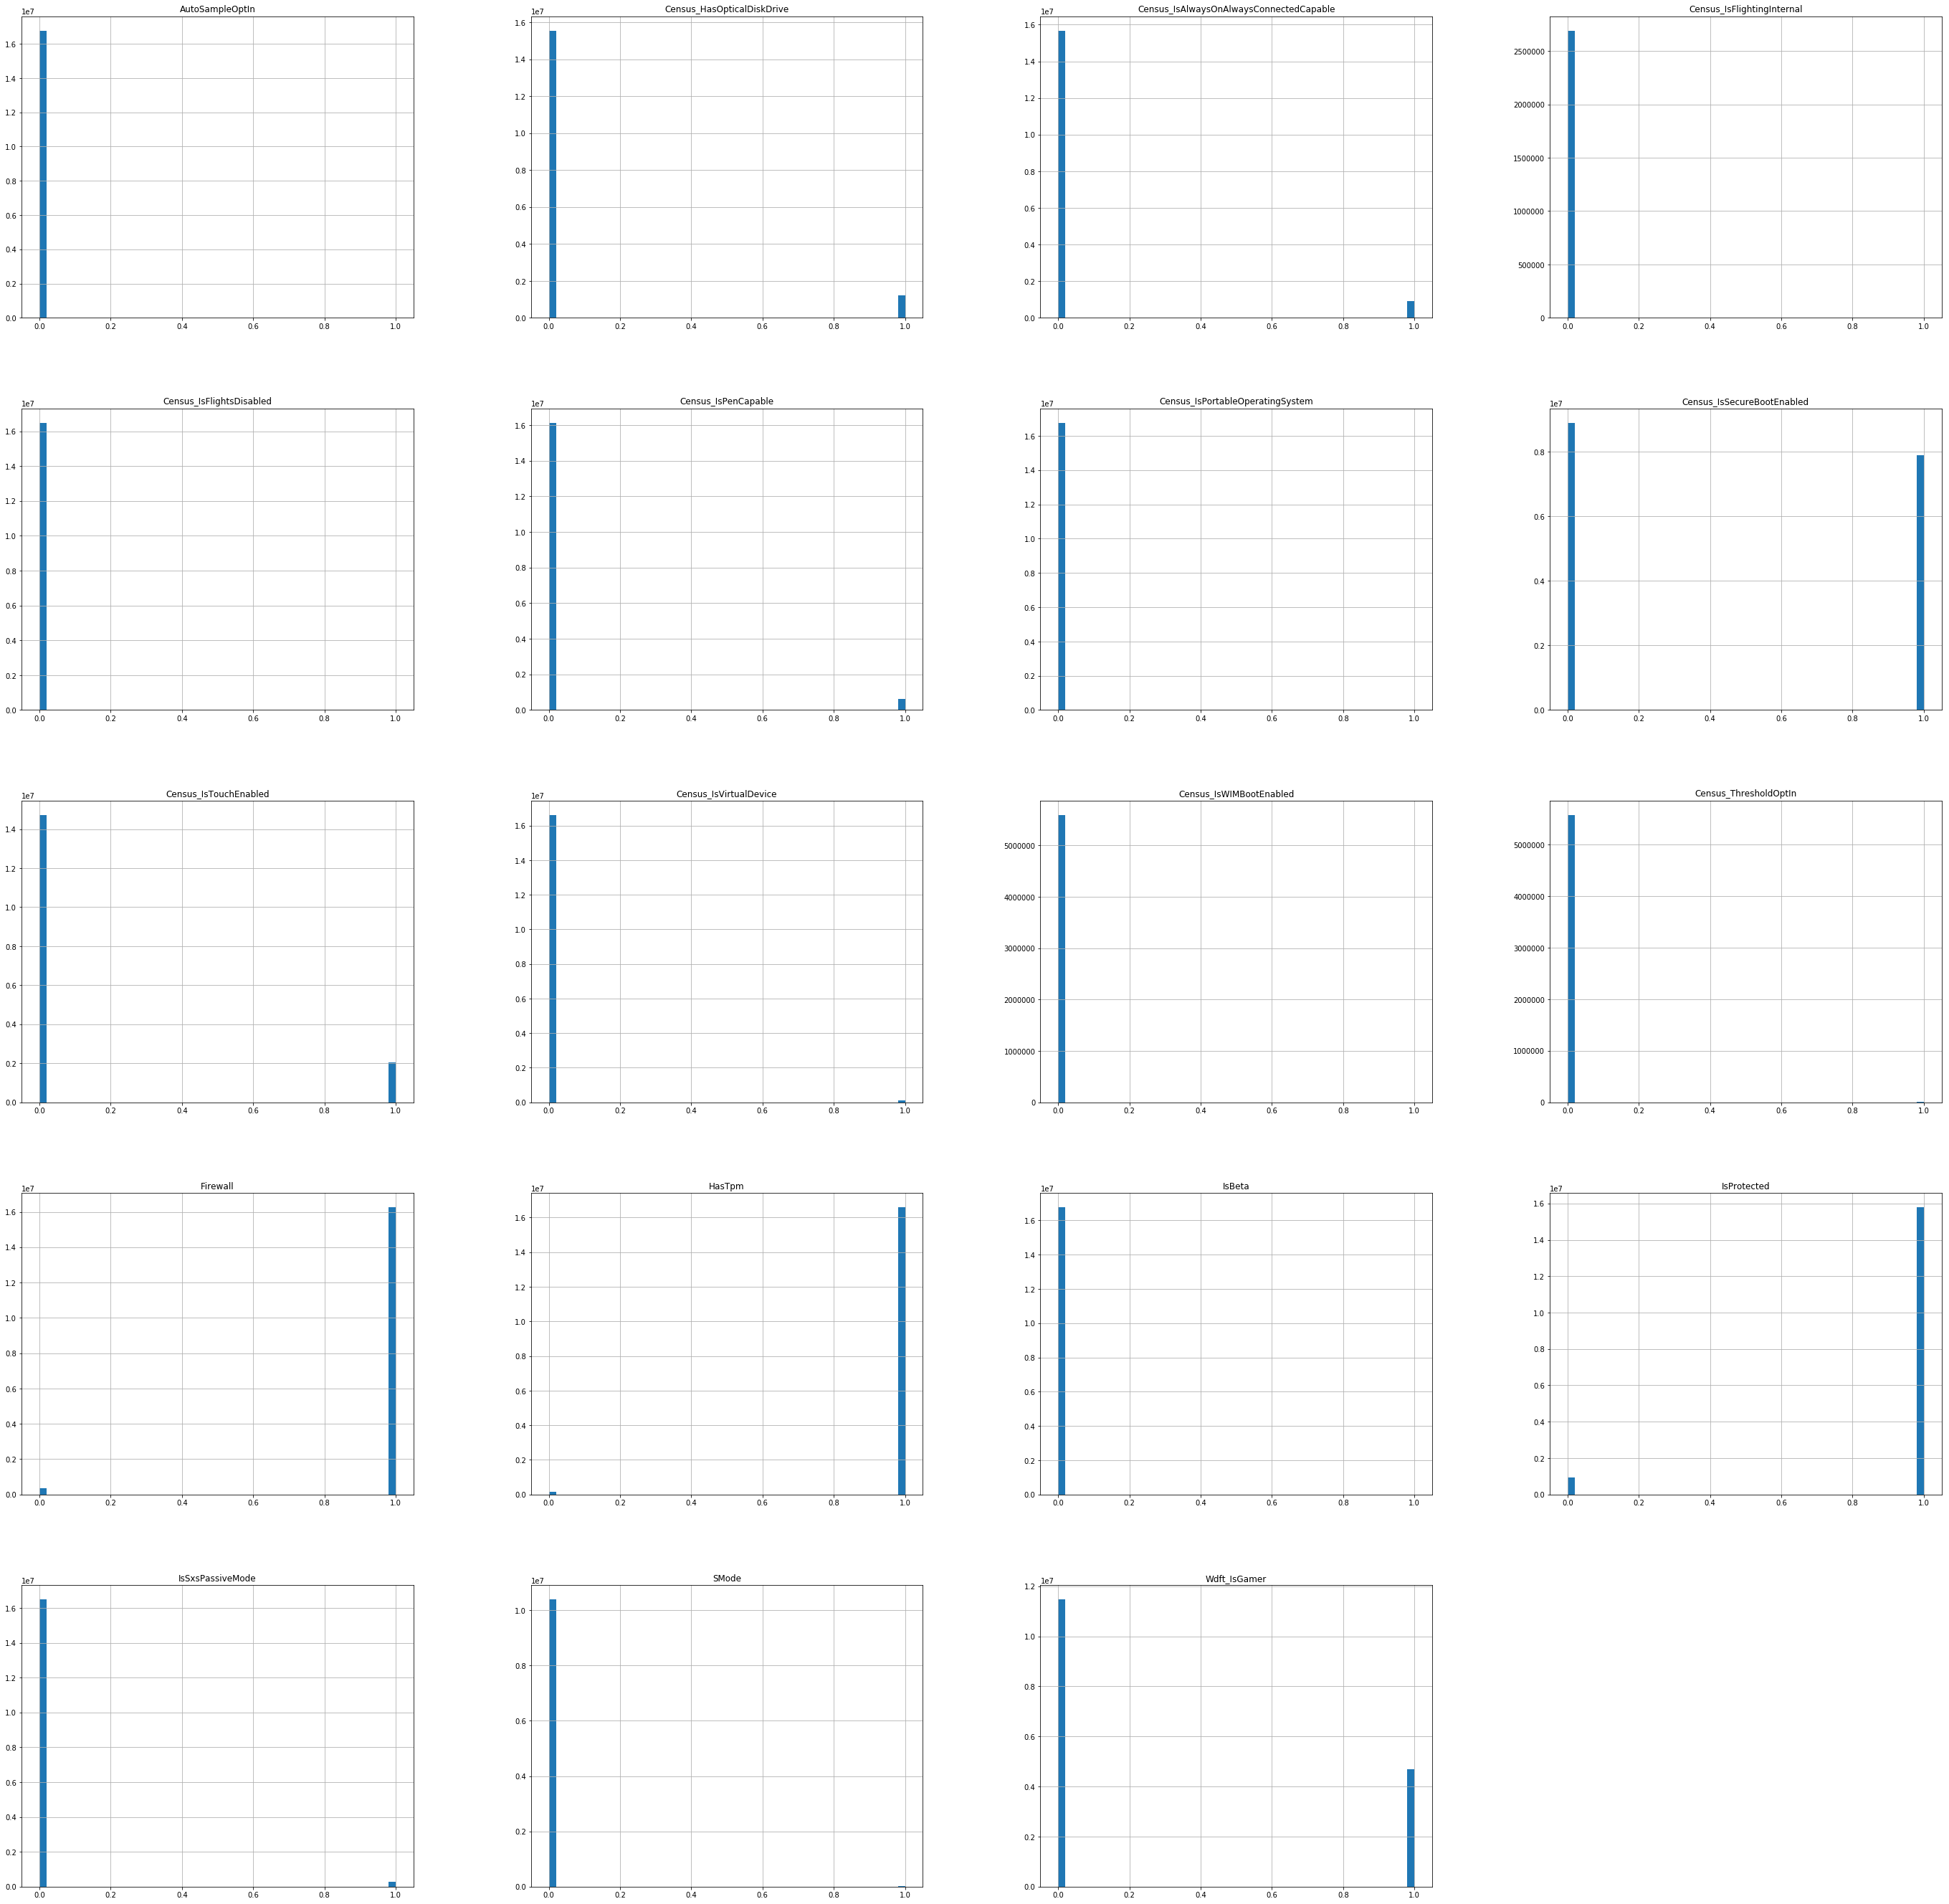

In [49]:
train_df = load_data("data.nosync/train.csv")
test_df = load_data("data.nosync/test.csv")
test_df['HasDetections'] = np.int8(3)
full_df = pd.concat([train_df, test_df])
analyze(full_df)